# Library

In [ ]:
'''
Library yang digunakan untuk proyek ini
'''
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn import cluster
from sklearn.metrics import pairwise_distances
from scipy.cluster import hierarchy
import scipy.stats as scp

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Perceptron, Ridge, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, pairwise_distances, r2_score, silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from collections import Counter
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss


In [ ]:
pd.set_option('display.max_rows',None)

# Bank Churner

## Domain proyek

### `Analisis Churn (Pergantian Nasabah) dalam Industri Perbankan`


---


**Latar Belakang:**

Industri perbankan menghadapi tantangan yang signifikan dalam mempertahankan nasabah yang ada. Pergantian nasabah atau churn dapat menyebabkan kerugian keuangan dan reputasi bagi lembaga keuangan. Oleh karena itu, penting untuk memahami faktor-faktor yang mempengaruhi churn nasabah dan mengembangkan strategi yang efektif untuk meminimalkan churn.

**Penelitian terkait:**

Smith, J., & Johnson, A. (Tahun). "Customer Churn Prediction in Retail Banking: A Data Mining Approach." Journal of Business Research.

Brown, L., & Jones, B. (Tahun). "Predicting Customer Churn in Retail Banking: A Comparative Study of Machine Learning Techniques." Expert Systems with Applications.

## Business Understanding

**Pernyataan Masalah**

*   Pernyataan Masalah 1:
Berdasarkan latar belakang yang telah disajikan, masalah yang ingin diselesaikan adalah bagaimana memprediksi churn nasabah dalam industri perbankan untuk mengambil langkah-langkah pencegahan yang diperlukan.

*   Pernyataan Masalah 2:
Masalah lain yang ingin diatasi adalah bagaimana mengidentifikasi faktor-faktor utama yang berkontribusi terhadap churn nasabah dalam industri perbankan.

**Goals**

*   Jawaban Pernyataan Masalah 1:

Tujuan dari pernyataan masalah pertama adalah mengembangkan model prediksi churn nasabah yang akurat berdasarkan faktor-faktor yang relevan dalam industri perbankan. Hal ini akan membantu lembaga keuangan mengidentifikasi nasabah yang berpotensi churn dan mengambil tindakan yang sesuai untuk mempertahankan mereka.

*   Jawaban Pernyataan Masalah 2:

Tujuan dari pernyataan masalah kedua adalah mengidentifikasi faktor-faktor kunci yang berpengaruh terhadap churn nasabah dalam industri perbankan. Dengan pemahaman yang lebih baik tentang faktor-faktor ini, lembaga keuangan dapat mengambil langkah-langkah pencegahan yang lebih efektif dan mempertahankan nasabah mereka.

**Solution statements**

*   Menggunakan teknik machine learning seperti regresi logistik, pohon keputusan, algoritma naive bayes, dan algoritma lainnya untuk membangun model prediksi churn nasabah.

*   Melakukan analisis fitur untuk menentukan faktor-faktor yang paling penting dalam mempengaruhi churn nasabah dan menggunakan informasi ini untuk meningkatkan keputusan bisnis.

*   Solusi yang diusulkan akan dievaluasi menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan f1-score untuk memastikan keandalan dan kinerja model prediksi churn nasabah.

*   Melakukan hyperparameter tuning dengan GridSearchCV pada model terbaik.

## Data Understanding

In [ ]:
# Import dataset Bank Churner
df_bank = pd.read_csv(
    'https://drive.google.com/u/2/uc?id=1-4tna2lDs6Dchd6UyXQgoCA738j1z2Bh')
df_bank.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
df_bank.shape

(10127, 21)

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Variabel-variabel pada dataset adalah sebagai berikut:**
1. CLIENTNUM: Nomor identifikasi unik untuk setiap nasabah dalam dataset. Ini adalah variabel yang digunakan untuk mengidentifikasi individu secara unik.

2. Attrition_Flag: Variabel ini menunjukkan apakah nasabah churned (pergi) atau masih aktif. Nilai "Existing Customer" menunjukkan nasabah yang masih aktif, sementara nilai "Attrited Customer" menunjukkan nasabah yang telah churned.

3. Customer_Age: Variabel ini menunjukkan usia nasabah dalam tahun.

4. Gender: Variabel ini menunjukkan jenis kelamin nasabah. Nilai "M" menunjukkan laki-laki, sementara nilai "F" menunjukkan perempuan.

5. Dependent_count: Variabel ini menunjukkan jumlah orang yang menjadi tanggungan nasabah, seperti pasangan atau anak-anak.

6. Education_Level: Variabel ini menunjukkan tingkat pendidikan nasabah. Nilai-nilai yang mungkin termasuk "Unknown", "Uneducated", "High School", "College", "Graduate", "Post-Graduate", dan "Doctorate".

7. Marital_Status: Variabel ini menunjukkan status perkawinan nasabah. Nilai-nilai yang mungkin termasuk "Unknown", "Single", "Married", "Divorced", dan "Separated".

8. Income_Category: Variabel ini menunjukkan kategori pendapatan nasabah. Nilai-nilai yang mungkin termasuk "Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", dan "$120K +".

9. Card_Category: Variabel ini menunjukkan jenis kategori kartu kredit yang dimiliki oleh nasabah. Nilai-nilai yang mungkin termasuk "Blue", "Silver", "Gold", dan "Platinum".

10. Months_on_book: Variabel ini menunjukkan jumlah bulan sejak nasabah pertama kali membuka rekening.

11. Total_Relationship_Count: Variabel ini menunjukkan jumlah produk keuangan yang dimiliki oleh nasabah di bank tersebut.

12. Months_Inactive_12_mon: Variabel ini menunjukkan jumlah bulan ketika nasabah tidak aktif dalam 12 bulan terakhir.

13. Contacts_Count_12_mon: Variabel ini menunjukkan jumlah kali nasabah dihubungi oleh bank dalam 12 bulan terakhir.

14. Credit_Limit: Variabel ini menunjukkan batas kredit yang diberikan kepada nasabah.

15. Total_Revolving_Bal: Variabel ini menunjukkan saldo total dari kredit yang belum dibayar oleh nasabah.

16. Avg_Open_To_Buy: Variabel ini menunjukkan rata-rata jumlah uang yang tersedia untuk nasabah dalam melakukan pembelian dengan kartu kredit.

17. Total_Amt_Chng_Q4_Q1: Variabel ini menunjukkan persentase perubahan total jumlah transaksi nasabah dari kuartal keempat ke kuartal pertama.

18. Total_Trans_Amt: Variabel ini menunjukkan jumlah total transaksi yang dilakukan oleh nasabah.

19. Total_Trans_Ct: Variabel ini menunjukkan jumlah total transaksi yang dilakukan oleh nasabah.

20. Total_Ct_Chng_Q4_Q1: Variabel ini menunjukkan persentase perubahan total jumlah transaksi nasabah dari kuartal keempat ke kuartal pertama.

21. Avg_Utilization_Ratio: Variabel ini menunjukkan rasio penggunaan rata-rata dari total kredit yang tersedia kepada nasabah.


#### Understading Missing Value Data

In [ ]:
# Fungsi untuk melihat jumlah missing values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(df_bank)

                 Total   Percent
Marital_Status     749  0.073961
Income_Category   1112  0.109805
Education_Level   1519  0.149995


#### Understading Duplicate Data

In [ ]:
df_bank.duplicated().sum()

0

#### Understading Outliers Data

In [ ]:
# Melihat jumlah outlier

Jumlah_Outlier = []

for i in df_bank.columns:

  # Melakukan looping untuk mencari outlier setiap kolom yang isinya bukan tipe data object
  if (df_bank[i].dtypes != 'object'):
    data = df_bank[i]

    # Mencari nilai IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Mencari RUB dan RLB
    RLB = Q1 - 1.5 * IQR
    RUB = Q3 + 1.5 * IQR

    # Mencari banyak outlier
    outlier_lower = data[data < RLB]
    outlier_upper = data[data > RUB]
    jumlah_outlier = len(outlier_lower) + len(outlier_upper)
    persentase_outlier = jumlah_outlier/len(df_bank)

    Jumlah_Outlier.append([i, jumlah_outlier, persentase_outlier])

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Jumlah Outliers','Persentase Outliers']).sort_values(by=['Jumlah Outliers'], ascending = False,ignore_index=True)

,Column,Jumlah Outliers,Persentase Outliers
0,Credit_Limit,984,0.097166
1,Avg_Open_To_Buy,963,0.095092
2,Total_Trans_Amt,896,0.088476
3,Contacts_Count_12_mon,629,0.062111
4,Total_Amt_Chng_Q4_Q1,396,0.039103
5,Total_Ct_Chng_Q4_Q1,394,0.038906
6,Months_on_book,386,0.038116
7,Months_Inactive_12_mon,331,0.032685
8,Customer_Age,2,0.000197
9,Total_Trans_Ct,2,0.000197


### EDA

In [ ]:
df_eda = df_bank.copy()
df_eda.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


#### **Apa tingkat pendidikan pelanggan dengan rata-rata total transaksi terbesar?**

In [ ]:
df_mean = df_eda.groupby('Education_Level').mean().reset_index()
df_mean.head()

<ipython-input-11-918fdb02feff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_eda.groupby('Education_Level').mean().reset_index()


,Education_Level,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,College,7.411728e+08,45.970385,2.359329,35.682132,3.749260,2.353406,2.425469,8684.536130,1135.783810,7548.752320,0.764443,4255.806515,65.016782,0.714878,0.265399
1,Doctorate,7.374008e+08,47.261641,2.325942,36.820399,3.747228,2.352550,2.450111,8413.258980,1094.084257,7319.174723,0.741044,4193.015521,63.784922,0.692656,0.260619
2,Graduate,7.389346e+08,46.323529,2.347506,35.970588,3.825128,2.350064,2.459719,8566.100927,1162.380115,7403.720812,0.757418,4418.491368,64.883312,0.710724,0.277719
3,High School,7.390476e+08,46.345256,2.311972,35.970691,3.807253,2.329856,2.446597,8605.823547,1194.353204,7411.470343,0.762508,4403.740189,64.692996,0.714512,0.278275
4,Post-Graduate,7.389134e+08,45.562016,2.399225,35.352713,3.893411,2.313953,2.422481,8862.560465,1187.674419,7674.886047,0.767705,4515.414729,65.000000,0.702709,0.280572


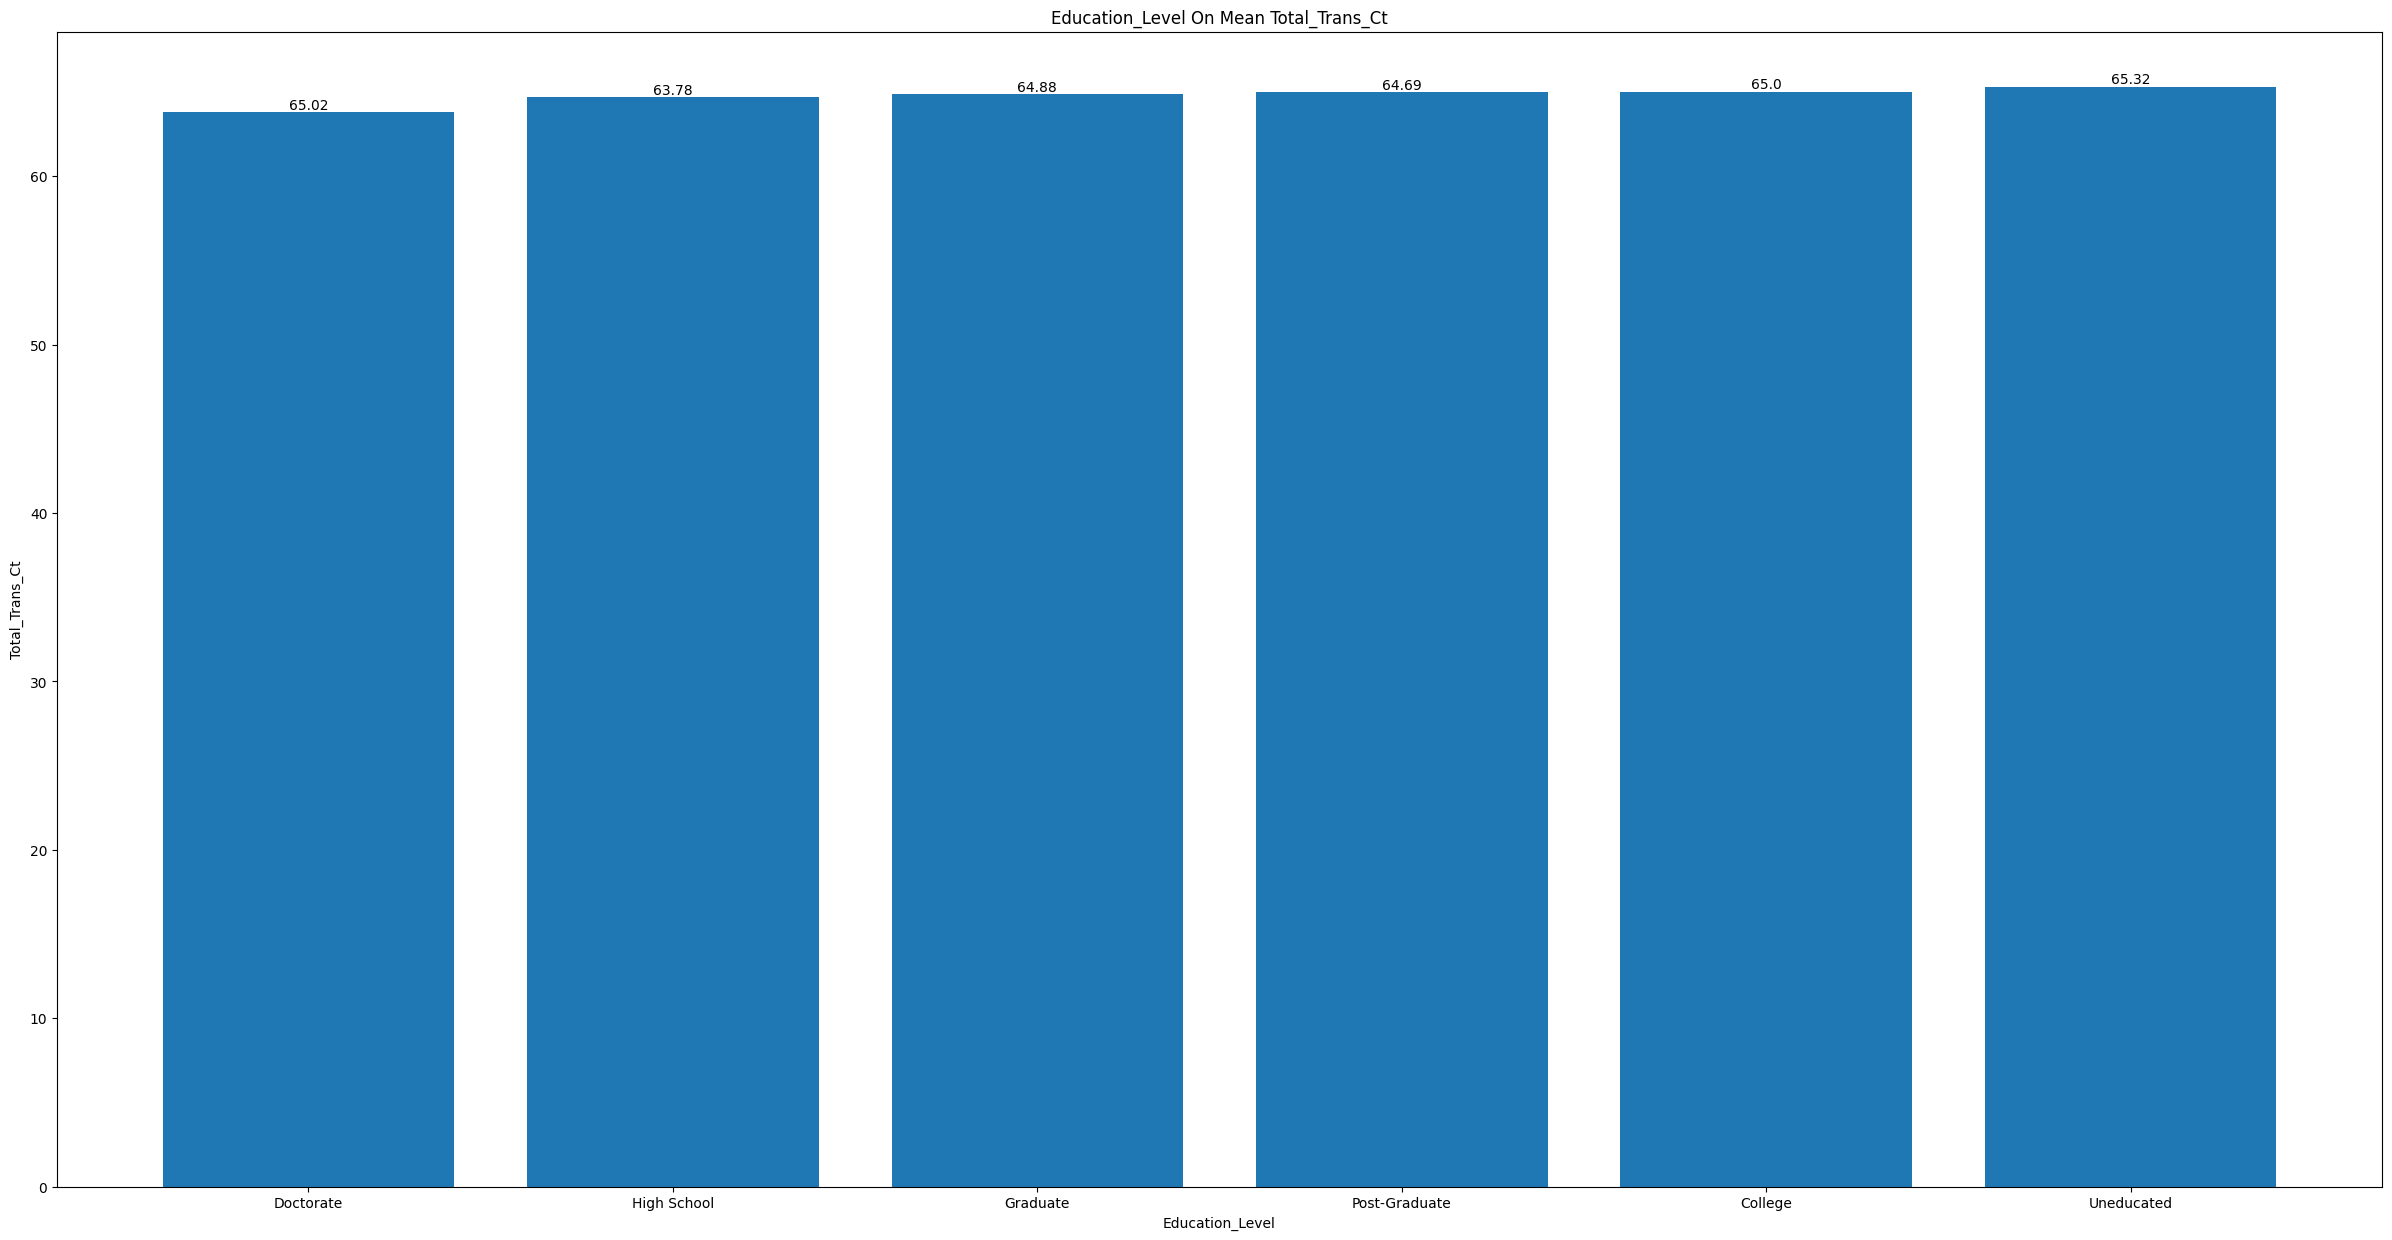

In [ ]:
data = df_mean.sort_values(by='Total_Trans_Ct')
fig = plt.figure(figsize = (30, 15))
bars = plt.bar(data['Education_Level'], data['Total_Trans_Ct'])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(data['Total_Trans_Ct'][i], 2)), ha='center', va='bottom')

plt.xlabel("Education_Level")
plt.ylabel('Total_Trans_Ct')
plt.title('Education_Level On Mean Total_Trans_Ct')
plt.show()

#### **Bagaimana karakteristik pelanggan yang telah menjadi "Attrited Customer"?**

In [ ]:
df_attrited  = df_eda.loc[df_eda['Attrition_Flag'] == 'Attrited Customer']
df_attrited.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,NaN,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
df_attrited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 1627 non-null   int64  
 1   Attrition_Flag            1627 non-null   object 
 2   Customer_Age              1627 non-null   int64  
 3   Gender                    1627 non-null   object 
 4   Dependent_count           1627 non-null   int64  
 5   Education_Level           1371 non-null   object 
 6   Marital_Status            1498 non-null   object 
 7   Income_Category           1440 non-null   object 
 8   Card_Category             1627 non-null   object 
 9   Months_on_book            1627 non-null   int64  
 10  Total_Relationship_Count  1627 non-null   int64  
 11  Months_Inactive_12_mon    1627 non-null   int64  
 12  Contacts_Count_12_mon     1627 non-null   int64  
 13  Credit_Limit              1627 non-null   float64
 14  Total_

In [ ]:
df_attrited.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [ ]:
df_attrited.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,1627,1627,1371,1498,1440,1627
unique,1,2,6,3,5,4
top,Attrited Customer,F,Graduate,Married,Less than $40K,Blue
freq,1627,930,487,709,612,1519


In [ ]:
jumlah_nasabah = []

for i in df_eda['Card_Category'].unique():
  total = len(df_eda.loc[df_eda['Card_Category'] == i])
  total_cond = len(df_attrited.loc[df_eda['Card_Category'] == i])

  if total != 0:
    jumlah_nasabah.append([i, total_cond, total, total_cond/total])
  else:
    jumlah_nasabah.append([i, total_cond, total, 0])

pd.DataFrame(jumlah_nasabah, columns=['Card_Category', 'Total Nasabah dengan Kondisi', 'Total Nasabah', 'Persentase Nasabah dengan Kondisi']).sort_values(by=['Total Nasabah dengan Kondisi'], ascending = False,ignore_index=True)

,Card_Category,Total Nasabah dengan Kondisi,Total Nasabah,Persentase Nasabah dengan Kondisi
0,Blue,1519,9436,0.160979
1,Silver,82,555,0.147748
2,Gold,21,116,0.181034
3,Platinum,5,20,0.250000


In [ ]:
jumlah_nasabah = []

for i in df_eda['Education_Level'].unique():
  total = len(df_eda.loc[df_eda['Education_Level'] == i])
  total_cond = len(df_attrited.loc[df_eda['Education_Level'] == i])

  if total != 0:
    jumlah_nasabah.append([i, total_cond, total, total_cond/total])
  else:
    jumlah_nasabah.append([i, total_cond, total, 0])

pd.DataFrame(jumlah_nasabah, columns=['Education_Level', 'Total Nasabah dengan Kondisi', 'Total Nasabah', 'Persentase Nasabah dengan Kondisi']).sort_values(by=['Total Nasabah dengan Kondisi'], ascending = False,ignore_index=True)

,Education_Level,Total Nasabah dengan Kondisi,Total Nasabah,Persentase Nasabah dengan Kondisi
0,Graduate,487,3128,0.155691
1,High School,306,2013,0.152012
2,Uneducated,237,1487,0.159381
3,College,154,1013,0.152024
4,Doctorate,95,451,0.210643
5,Post-Graduate,92,516,0.178295
6,NaN,0,0,0.000000


In [ ]:
jumlah_nasabah = []

for i in df_eda['Income_Category'].unique():
  total = len(df_eda.loc[df_eda['Income_Category'] == i])
  total_cond = len(df_attrited.loc[df_eda['Income_Category'] == i])

  if total != 0:
    jumlah_nasabah.append([i, total_cond, total, total_cond/total])
  else:
    jumlah_nasabah.append([i, total_cond, total, 0])

pd.DataFrame(jumlah_nasabah, columns=['Income_Category', 'Total Nasabah dengan Kondisi', 'Total Nasabah', 'Persentase Nasabah dengan Kondisi']).sort_values(by=['Total Nasabah dengan Kondisi'], ascending = False,ignore_index=True)

,Income_Category,Total Nasabah dengan Kondisi,Total Nasabah,Persentase Nasabah dengan Kondisi
0,Less than $40K,612,3561,0.171862
1,$40K - $60K,271,1790,0.151397
2,$80K - $120K,242,1535,0.157655
3,$60K - $80K,189,1402,0.134807
4,$120K +,126,727,0.173315
5,NaN,0,0,0.000000


#### **Apakah terdapat hubungan antara jenis kartu yang dimiliki nasabah dengan pendapatannya?**

##### Income_Category

Less than $40K

In [ ]:
df_40 = df_eda.loc[df_eda['Income_Category'] == 'Less than $40K'].reset_index()
df_40.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3556,10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,...,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.000
3557,10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,...,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.000
3558,10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
3559,10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
3560,10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


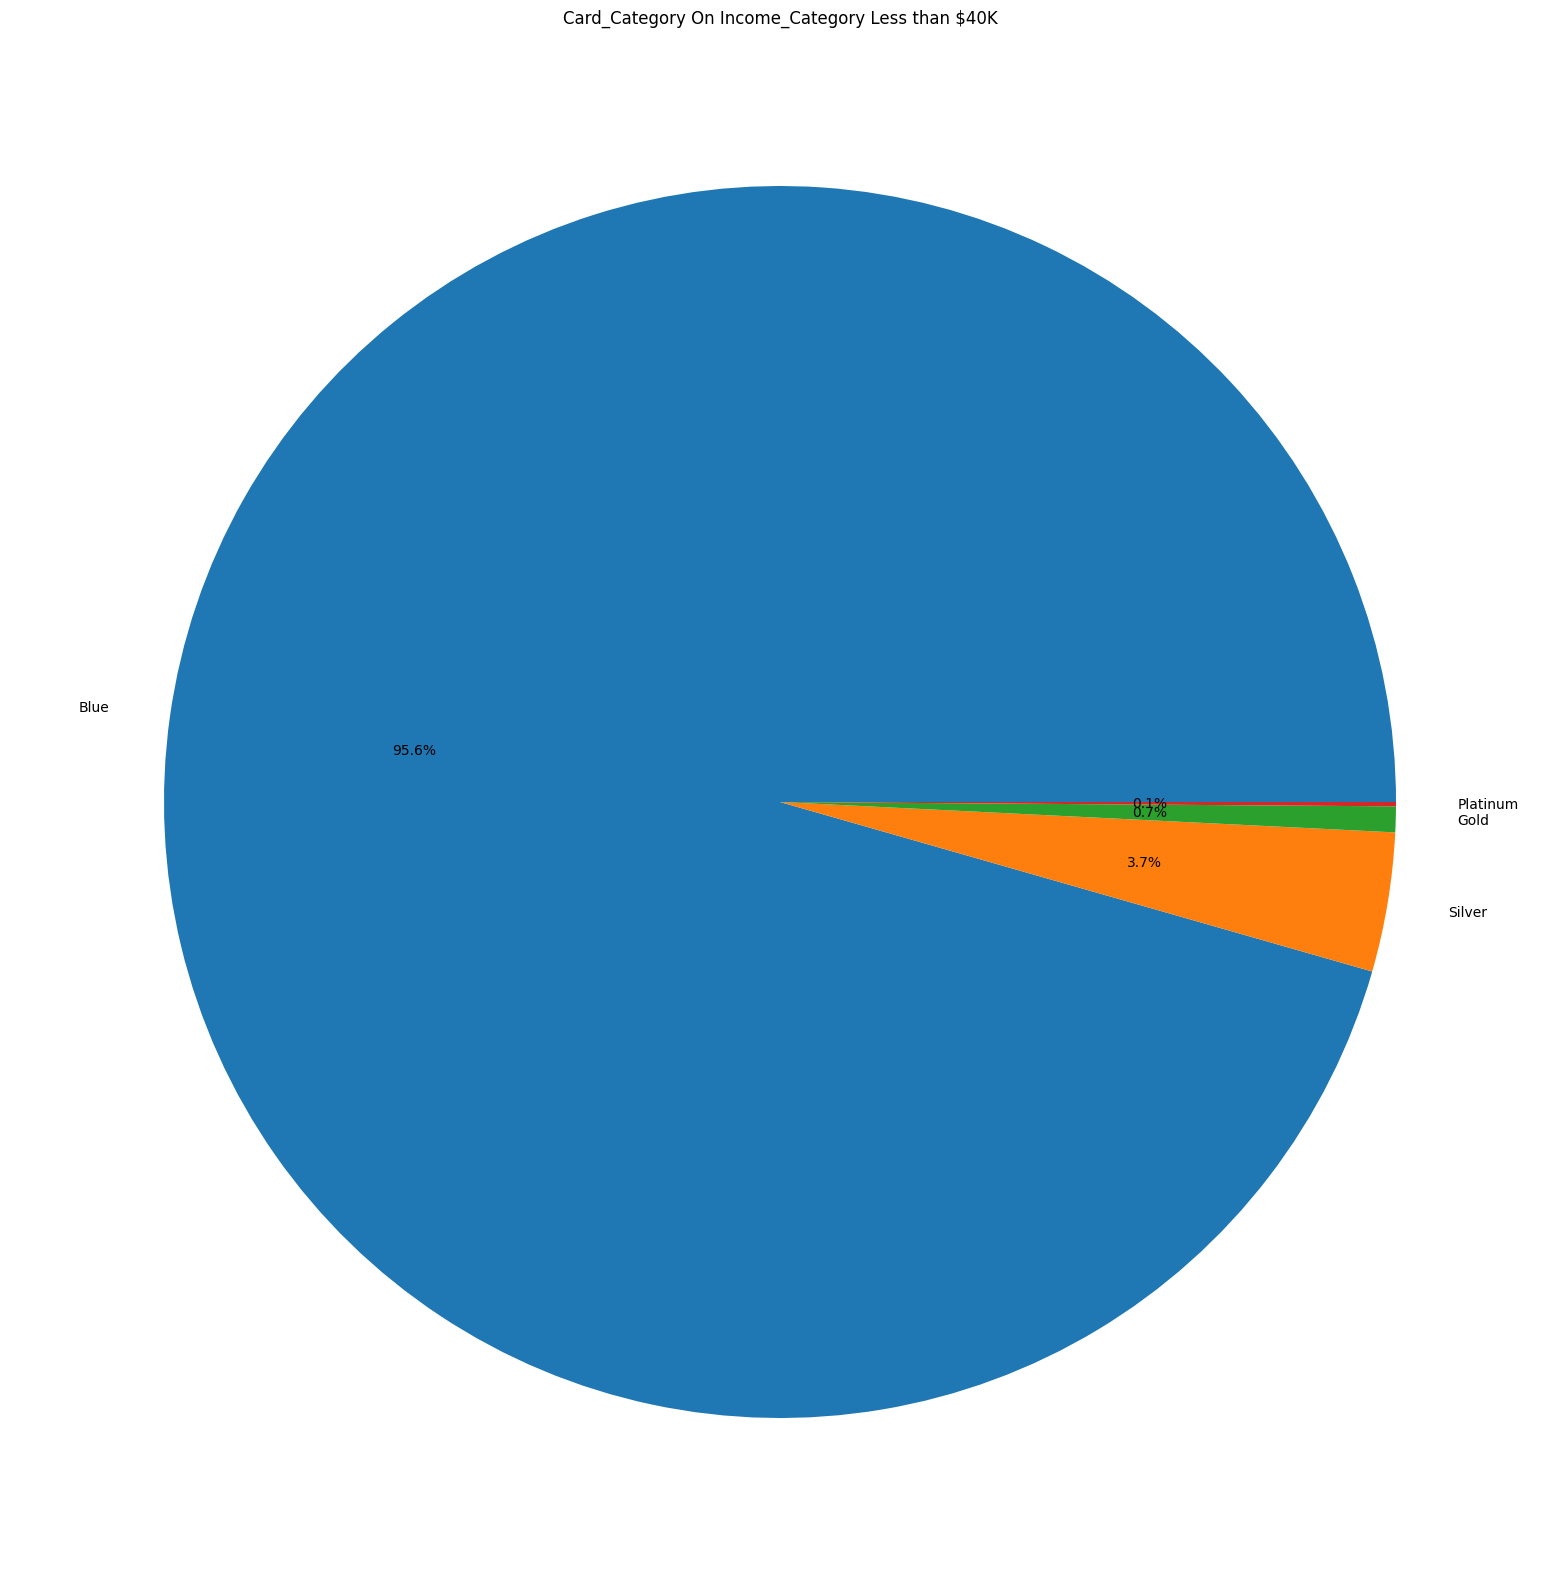

In [ ]:
data = df_40['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category Less than $40K')
plt.show()

$40K - $60K

In [ ]:
df_40_60 = df_eda.loc[df_eda['Income_Category'] == '$40K - $60K'].reset_index()
df_40_60.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1785,10101,718372458,Existing Customer,42,M,2,Graduate,NaN,$40K - $60K,Blue,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
1786,10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,...,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276
1787,10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
1788,10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
1789,10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


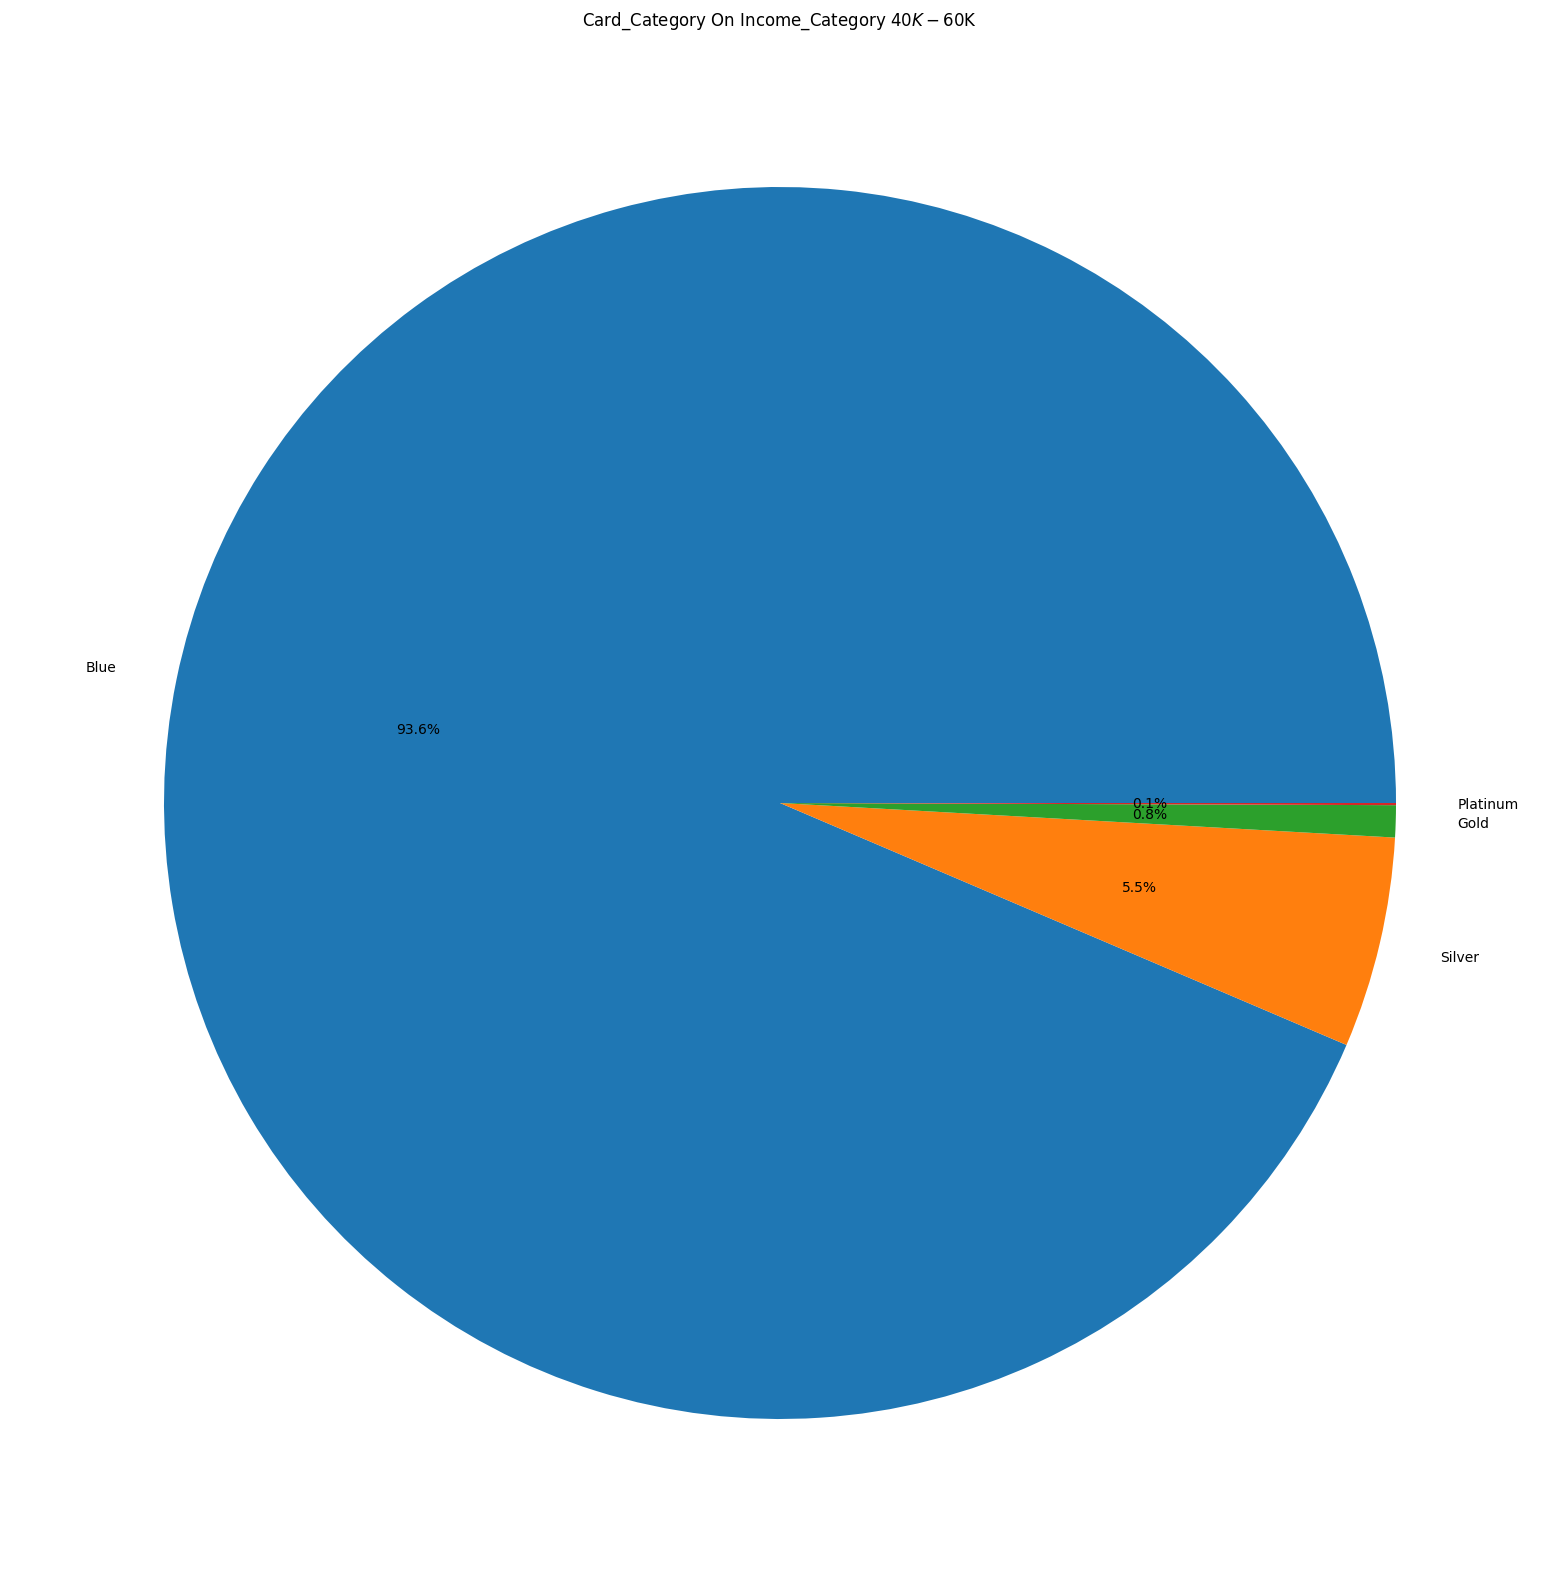

In [ ]:
data = df_40_60['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category $40K - $60K')
plt.show()

$60K - $80K

In [ ]:
df_60_80 = df_eda.loc[df_eda['Income_Category'] == '$60K - $80K'].reset_index()
df_60_80.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1397,10104,715474083,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,...,2,2,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059
1398,10107,713924283,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,...,1,4,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139
1399,10111,710734308,Existing Customer,49,M,1,Graduate,Single,$60K - $80K,Blue,...,3,3,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242
1400,10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,...,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189
1401,10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151


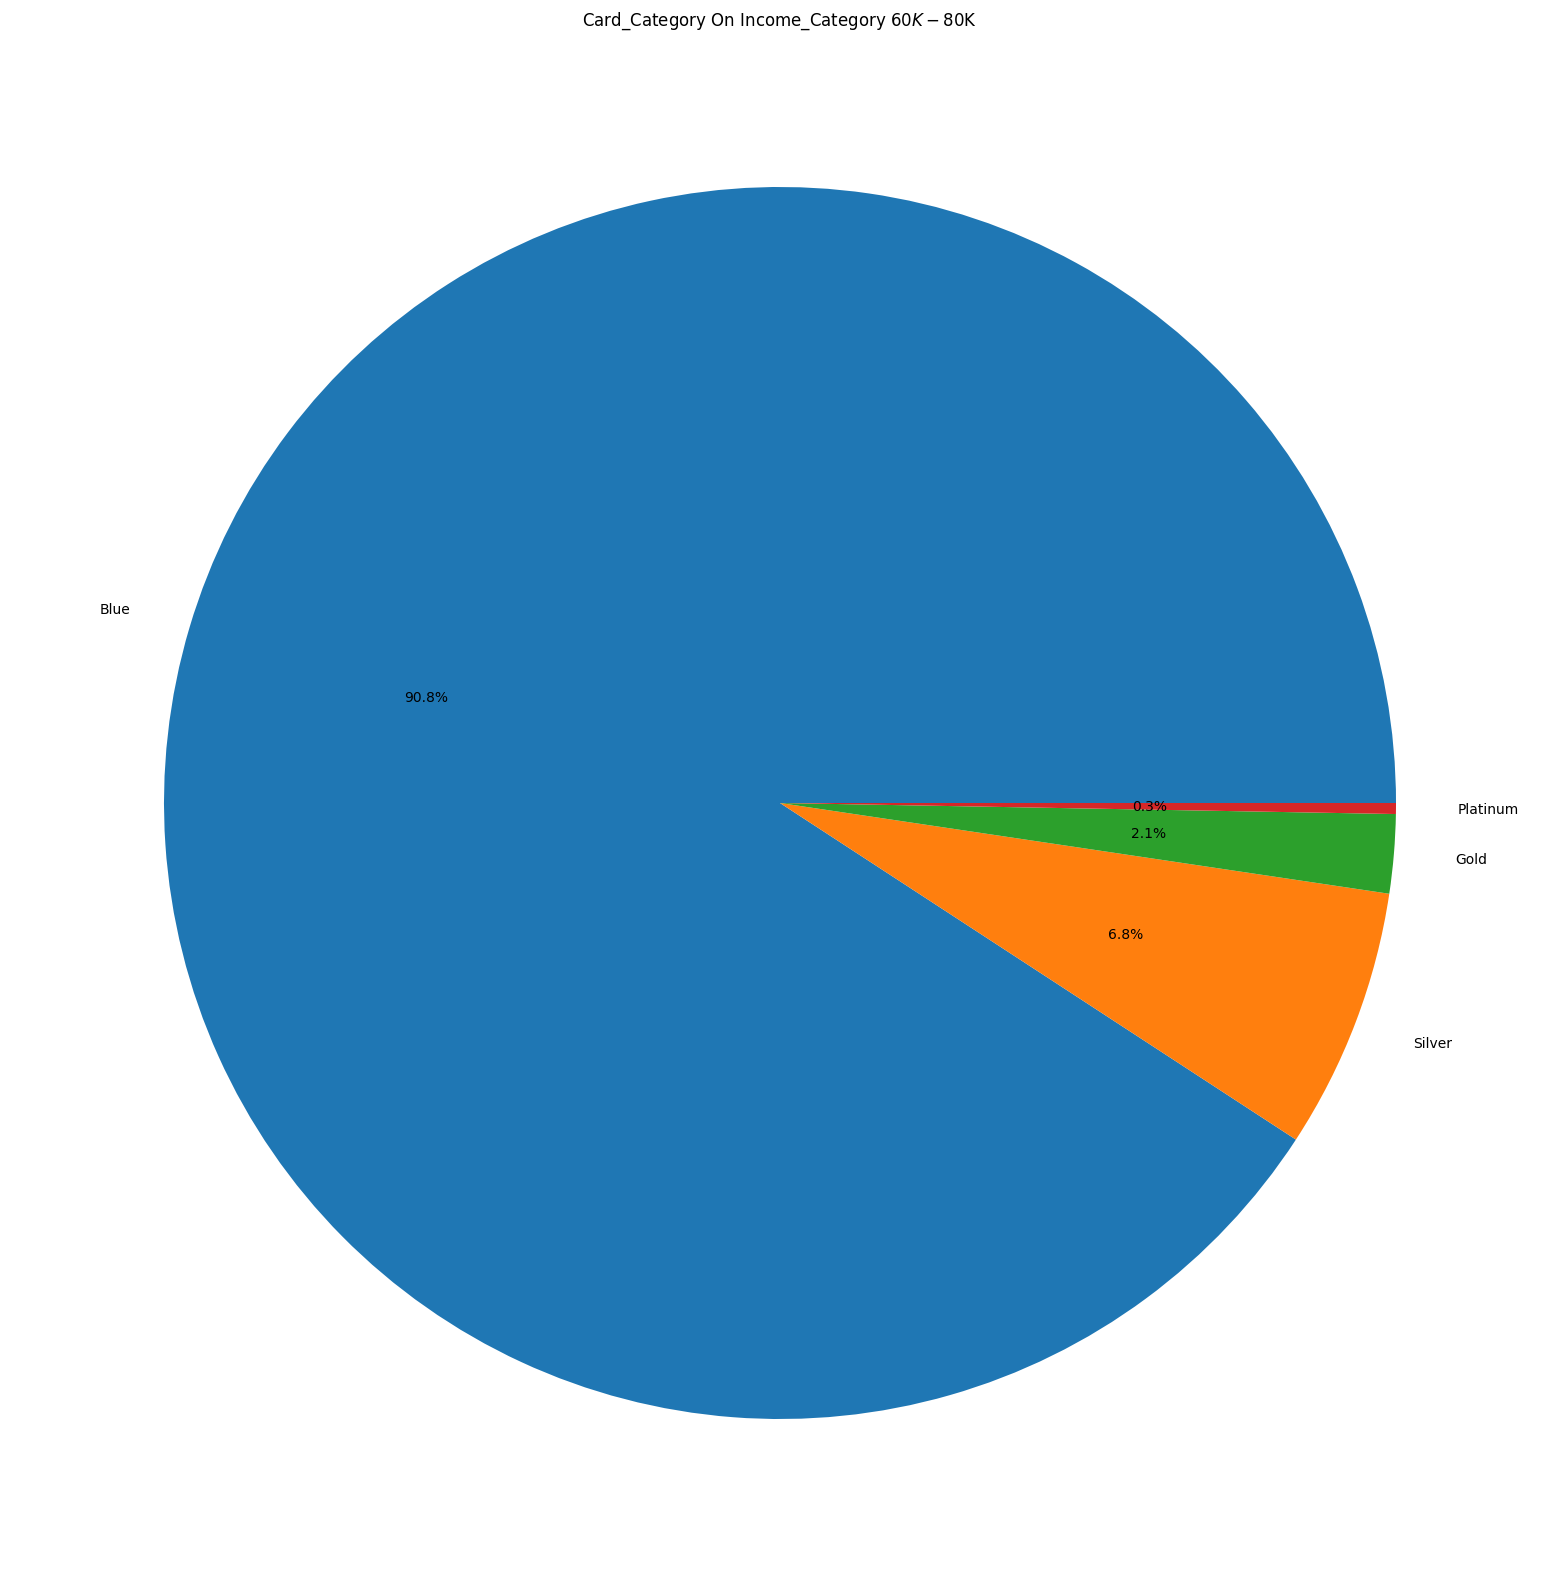

In [ ]:
data = df_60_80['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category $60K - $80K')
plt.show()

$80K - $120K

In [ ]:
df_80_120 = df_eda.loc[df_eda['Income_Category'] == '$80K - $120K'].reset_index()
df_80_120.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1530,10108,714471183,Attrited Customer,47,M,4,Graduate,Divorced,$80K - $120K,Blue,...,3,4,17504.0,476,17028.0,0.892,10468,66,0.737,0.027
1531,10110,718225683,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,...,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032
1532,10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
1533,10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
1534,10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


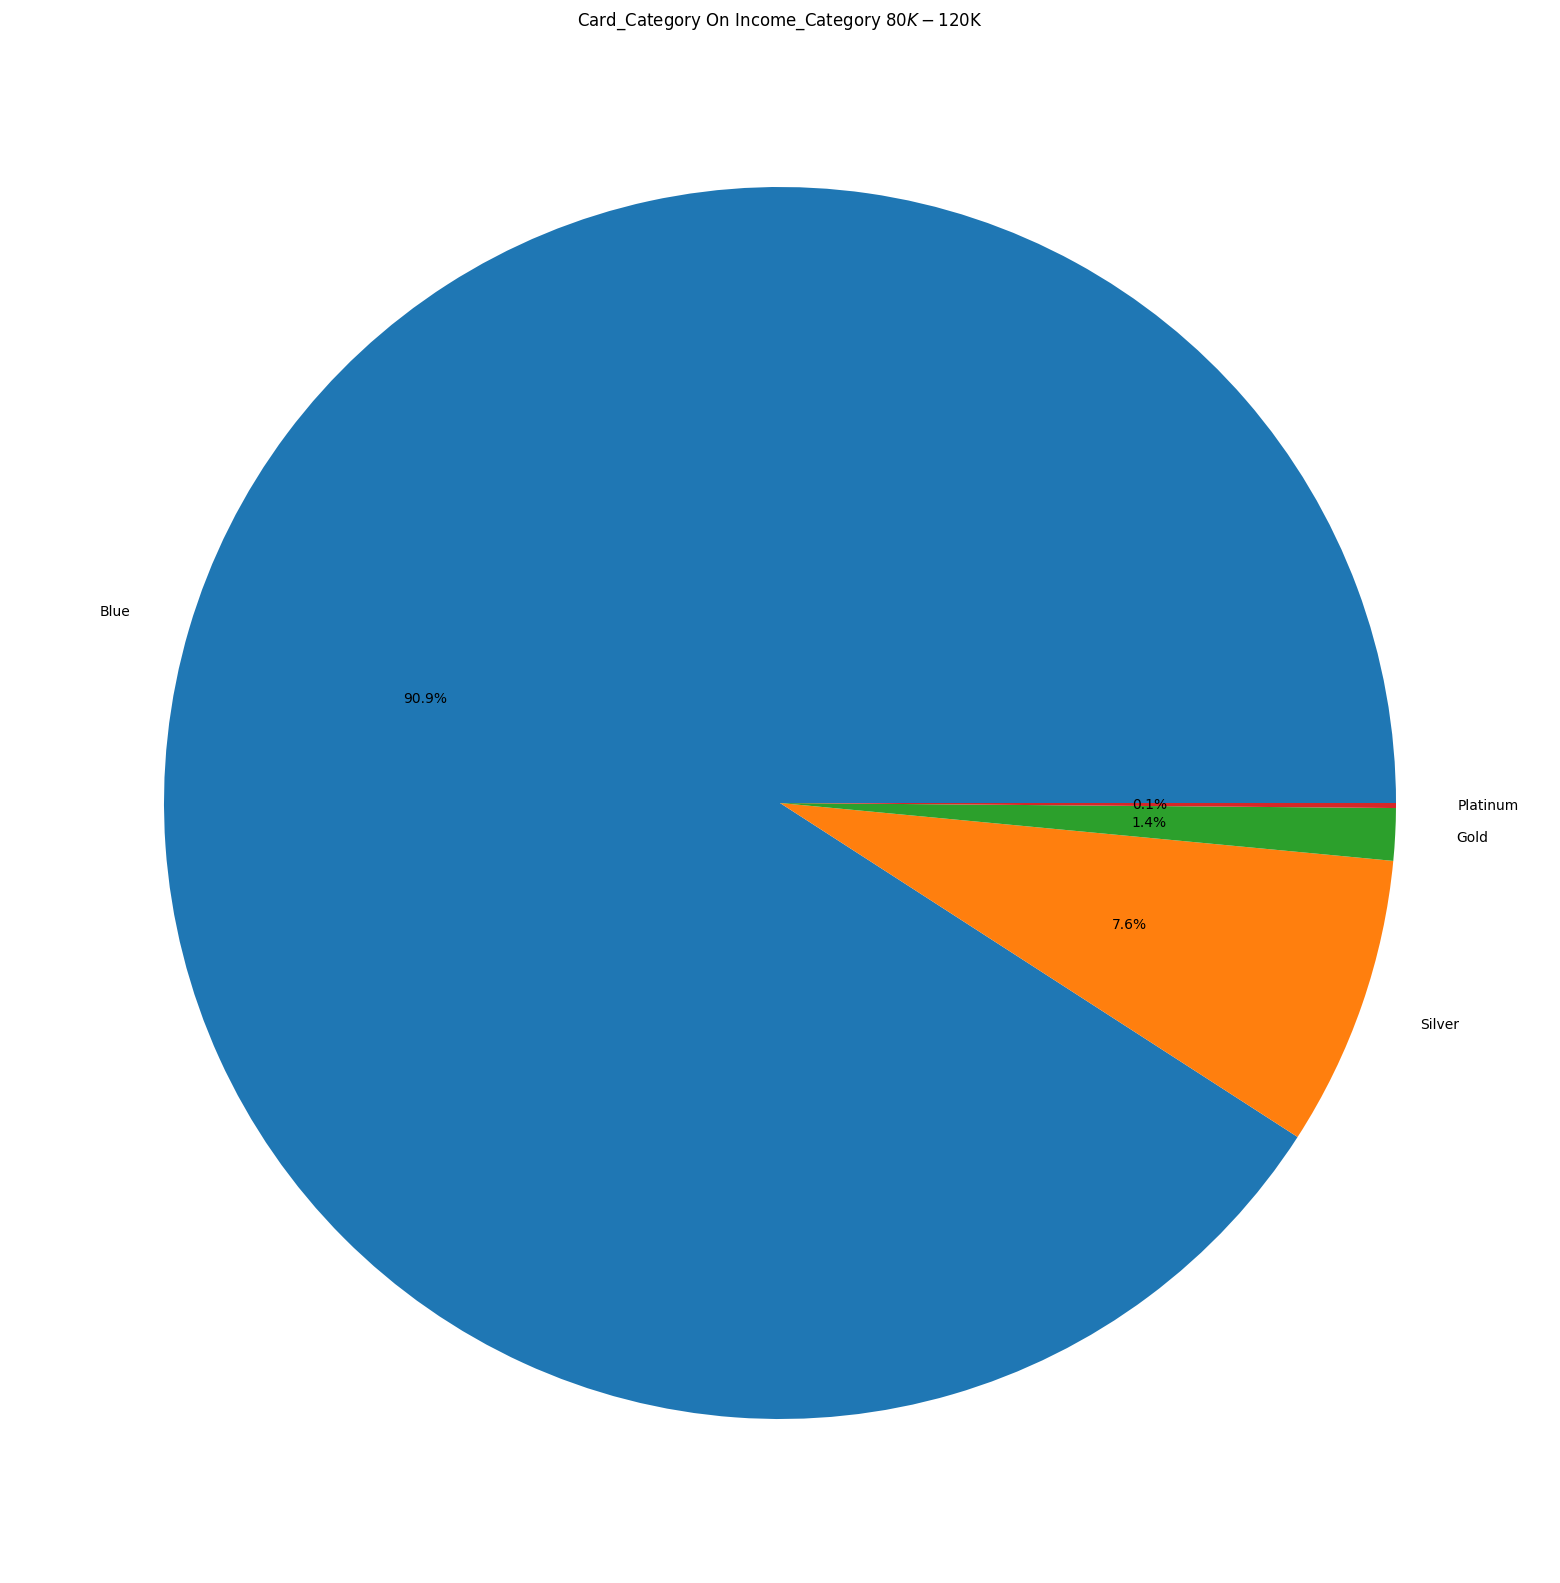

In [ ]:
data = df_80_120['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category $80K - $120K')
plt.show()

$120K +

In [ ]:
df_120 = df_eda.loc[df_eda['Income_Category'] == '$120K +'].reset_index()
df_120.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
722,10050,720128658,Attrited Customer,49,M,1,Uneducated,Single,$120K +,Blue,...,3,3,5181.0,0,5181.0,0.830,8943,68,1.000,0.000
723,10057,718043583,Existing Customer,50,M,2,Uneducated,Single,$120K +,Blue,...,3,4,21794.0,1368,20426.0,0.691,15111,116,0.706,0.063
724,10085,717714633,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,...,3,4,14938.0,0,14938.0,0.737,15277,131,0.724,0.000
725,10098,716644008,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,...,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
726,10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,...,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000


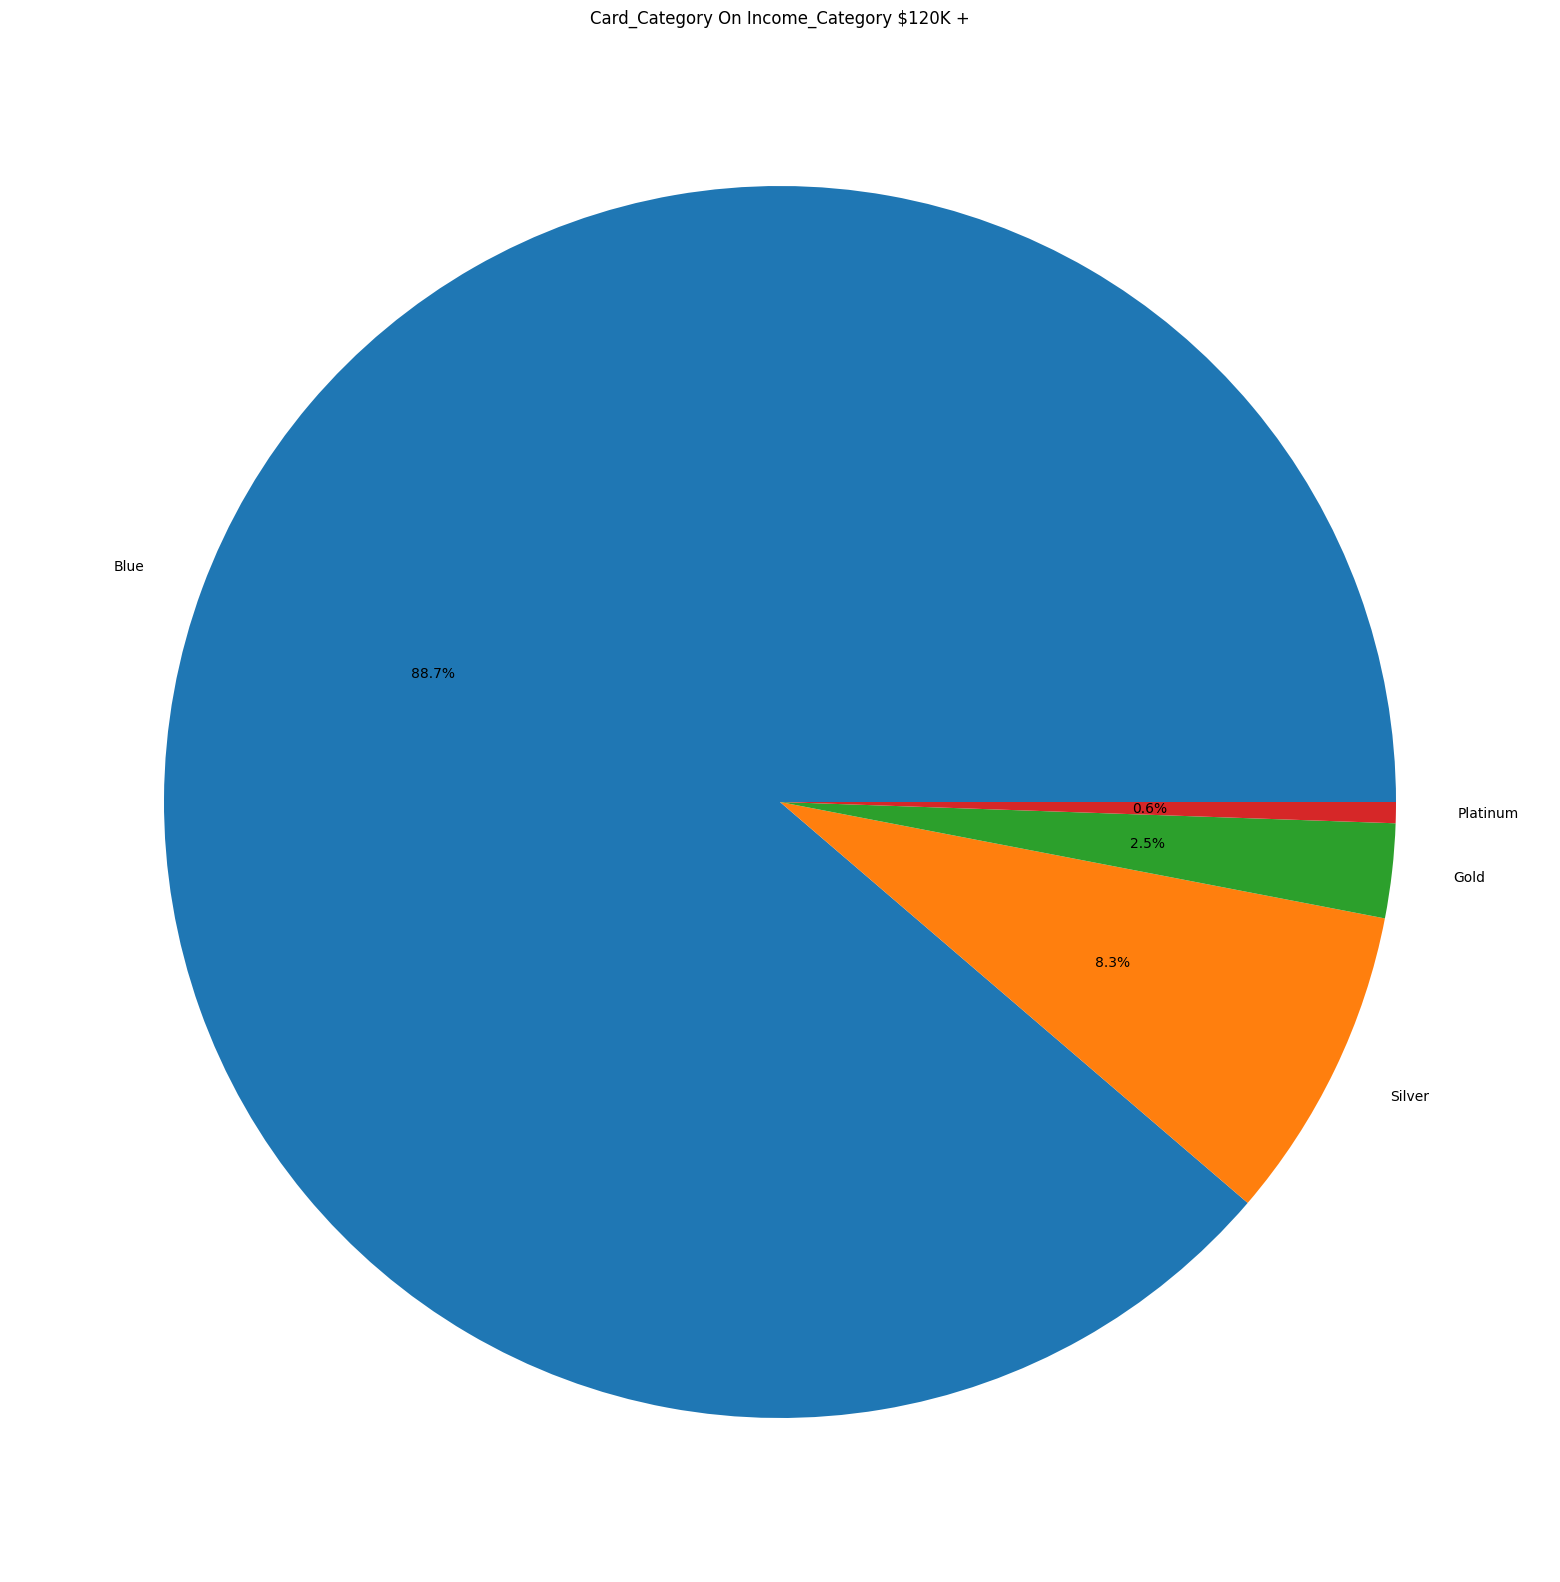

In [ ]:
data = df_120['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category $120K +')
plt.show()

##### Card_Category

Blue

In [ ]:
df_blue = df_eda.loc[df_eda['Card_Category'] == 'Blue'].reset_index()
df_blue.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9431,10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
9432,10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
9433,10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
9434,10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
9435,10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


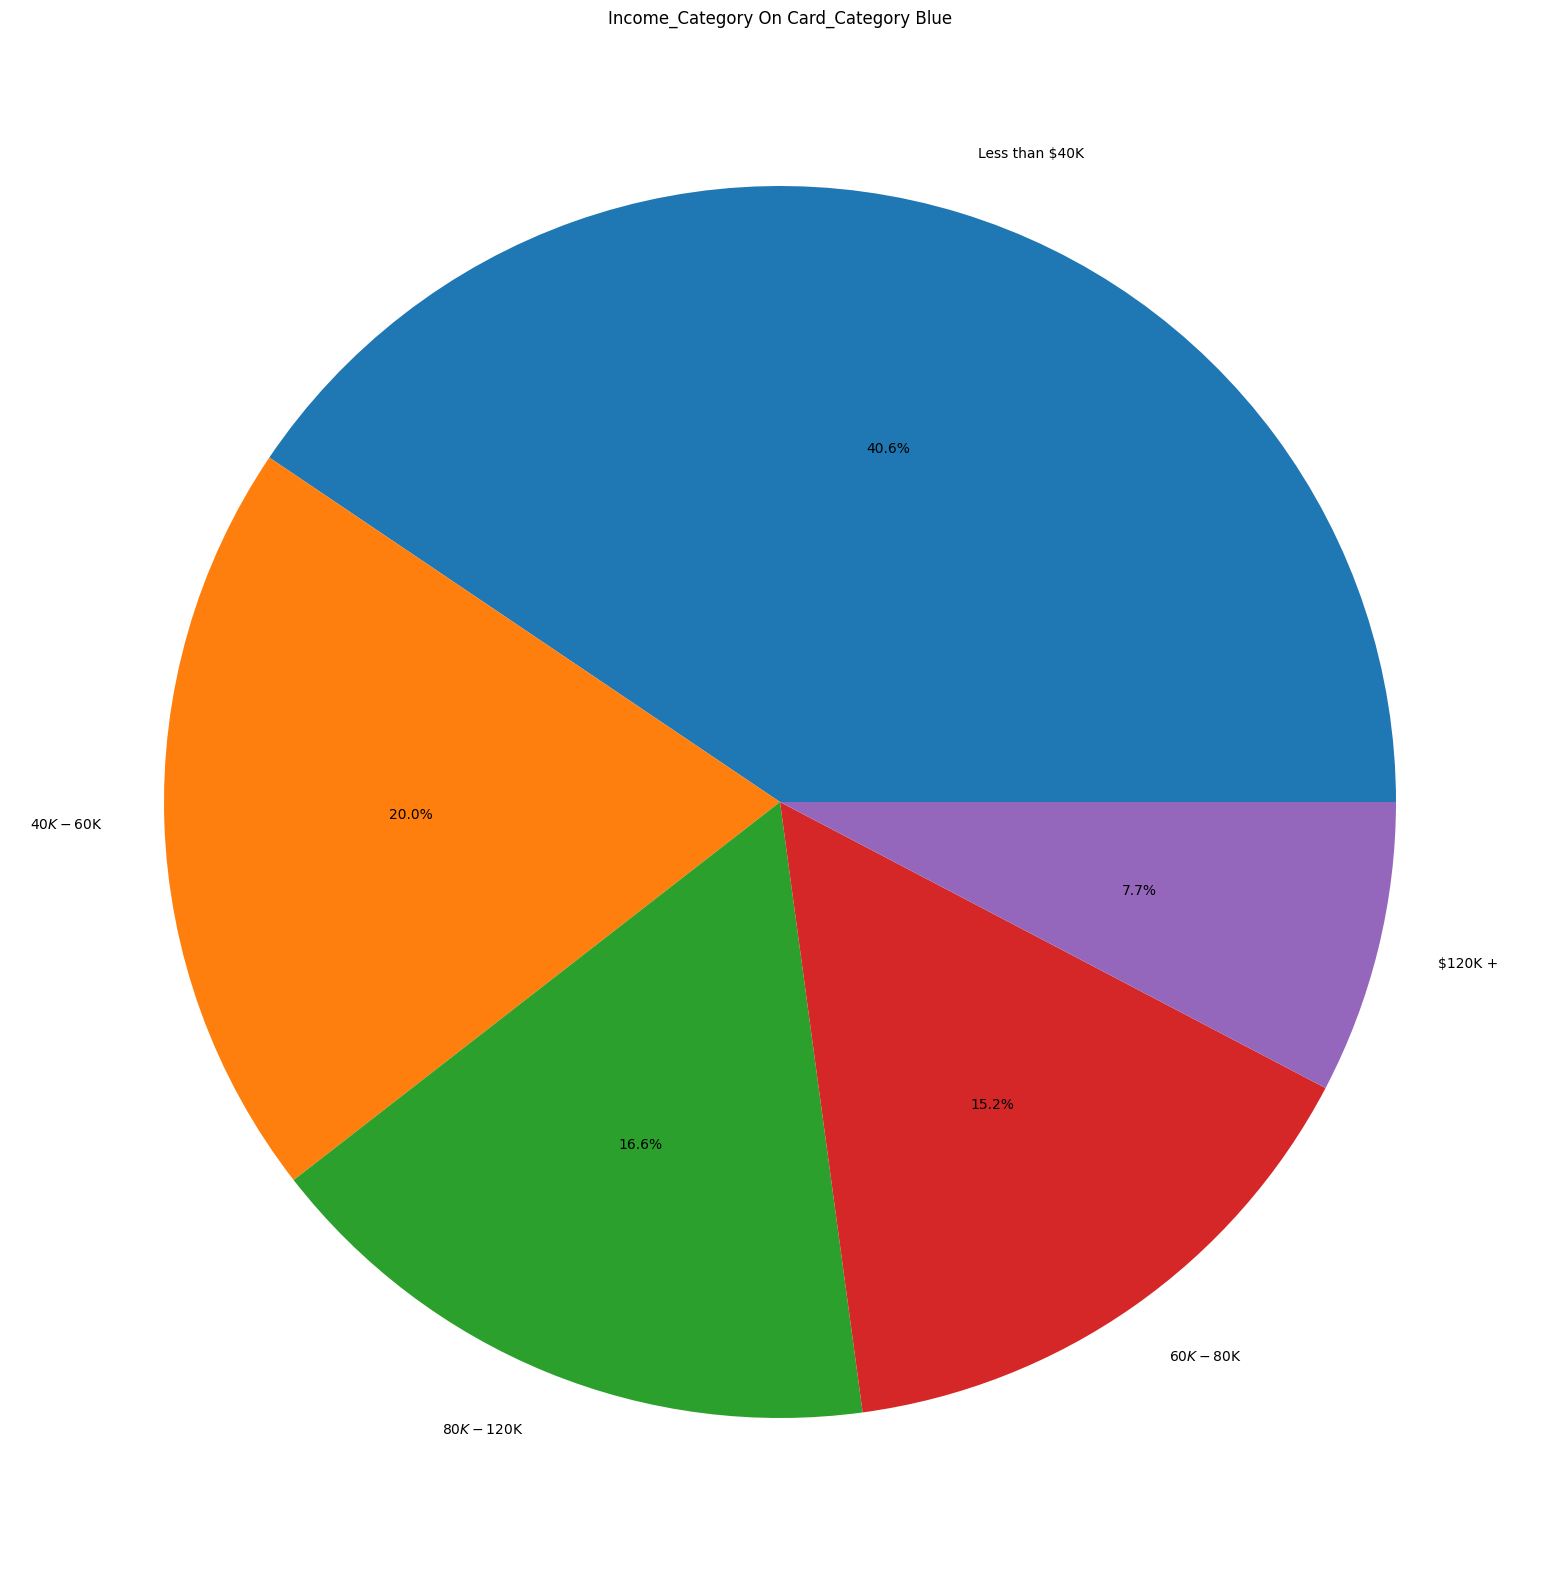

In [ ]:
data = df_blue['Income_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Income_Category On Card_Category Blue')
plt.show()

Silver

In [ ]:
df_silver = df_eda.loc[df_eda['Card_Category'] == 'Silver'].reset_index()
df_silver.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
550,10098,716644008,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,...,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
551,10100,719848008,Existing Customer,39,M,2,Graduate,NaN,$60K - $80K,Silver,...,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
552,10104,715474083,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,...,2,2,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059
553,10110,718225683,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,...,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032
554,10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


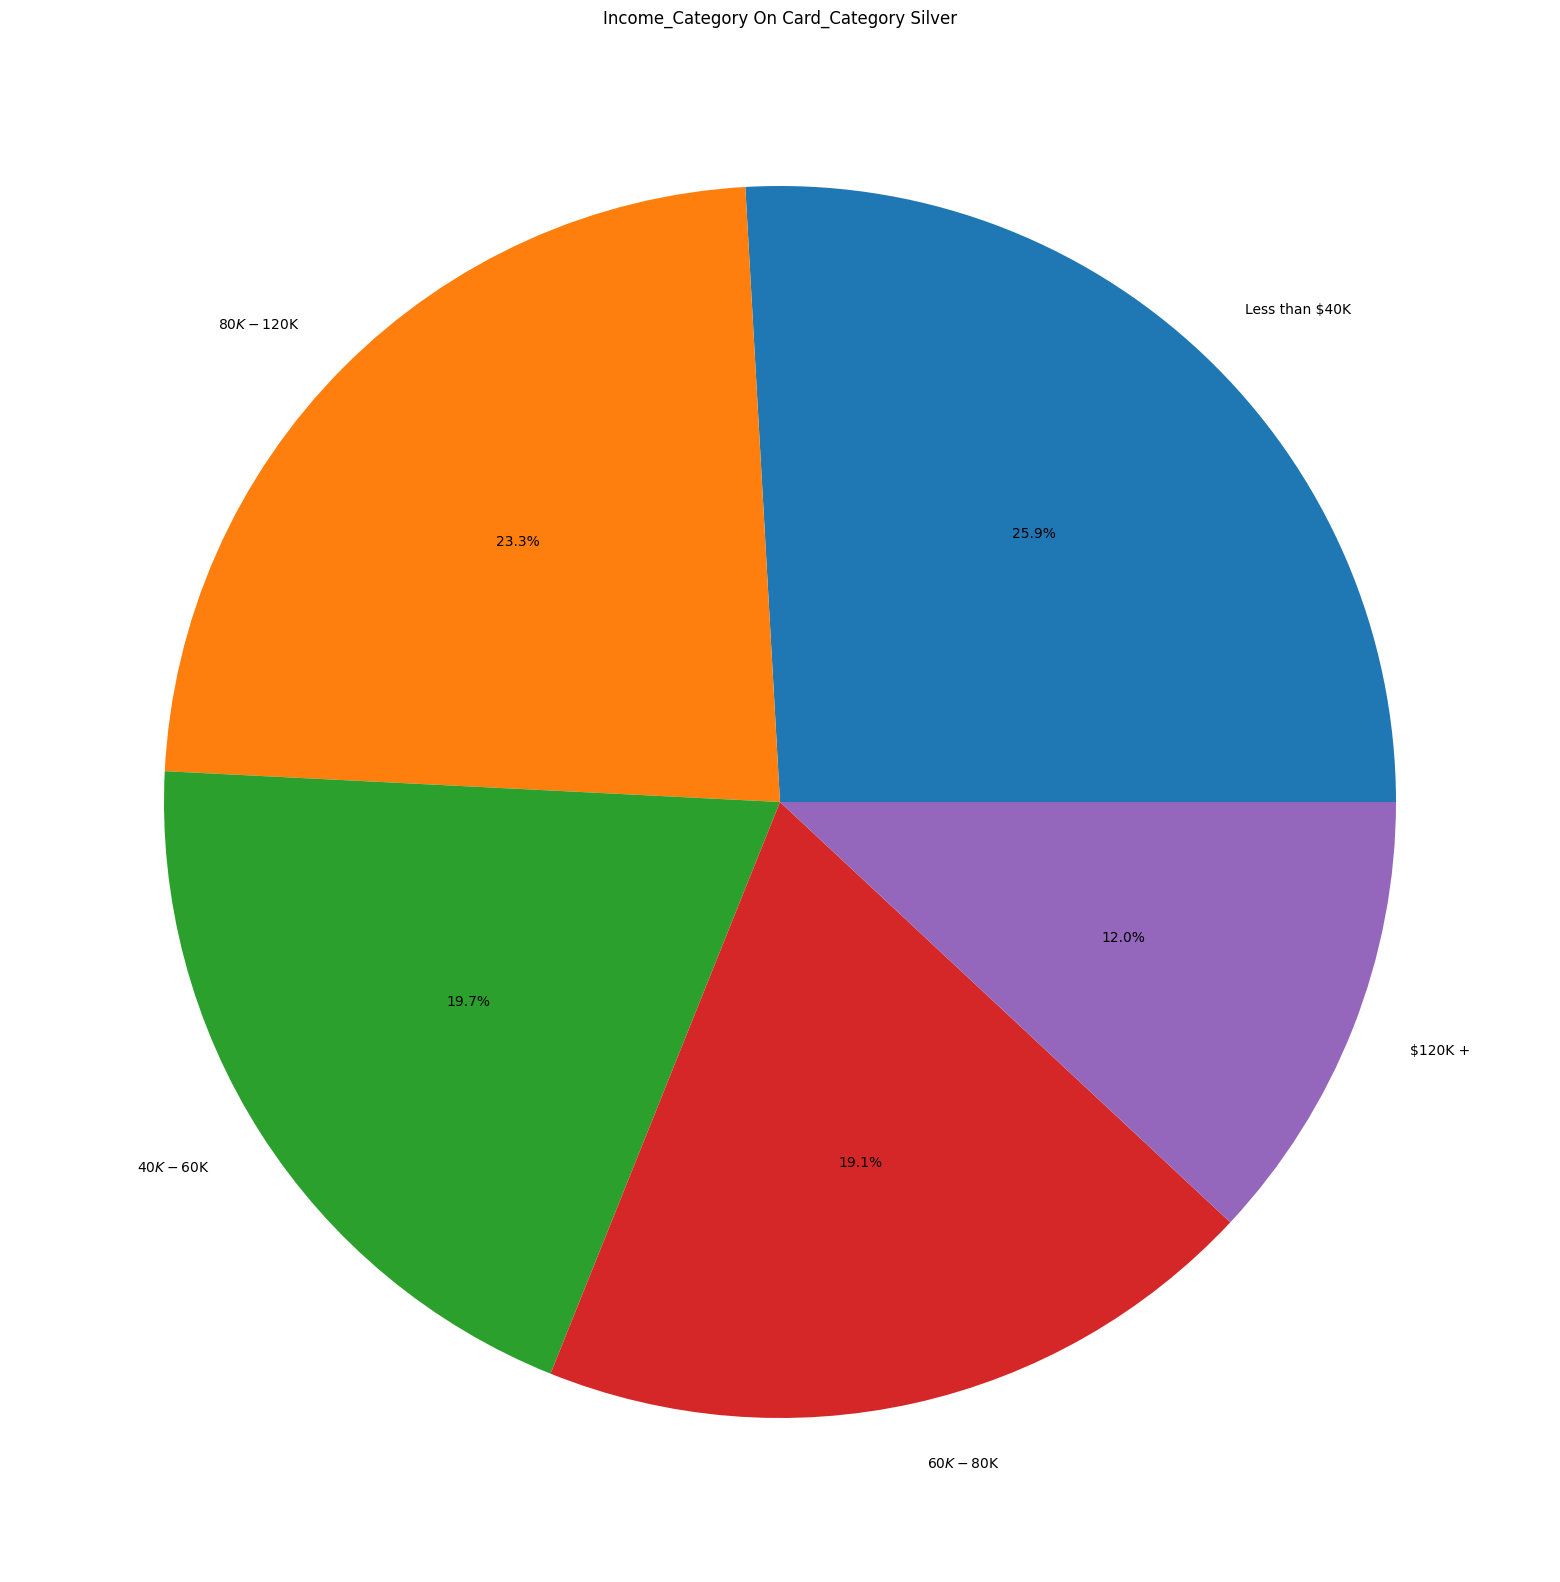

In [ ]:
data = df_silver['Income_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Income_Category On Card_Category Silver')
plt.show()

Gold

In [ ]:
df_gold = df_eda.loc[df_eda['Card_Category'] == 'Gold'].reset_index()
df_gold.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
111,10029,715268508,Existing Customer,42,M,3,Graduate,Married,$40K - $60K,Gold,...,2,5,23981.0,1399,22582.0,0.712,14840,125,0.761,0.058
112,10038,716850558,Existing Customer,48,M,4,Graduate,NaN,$60K - $80K,Gold,...,1,3,34516.0,1285,33231.0,0.654,15279,122,0.649,0.037
113,10049,715713408,Existing Customer,55,M,2,Graduate,Married,Less than $40K,Gold,...,5,3,15987.0,0,15987.0,0.820,15853,117,0.560,0.000
114,10085,717714633,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,...,3,4,14938.0,0,14938.0,0.737,15277,131,0.724,0.000
115,10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,...,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000


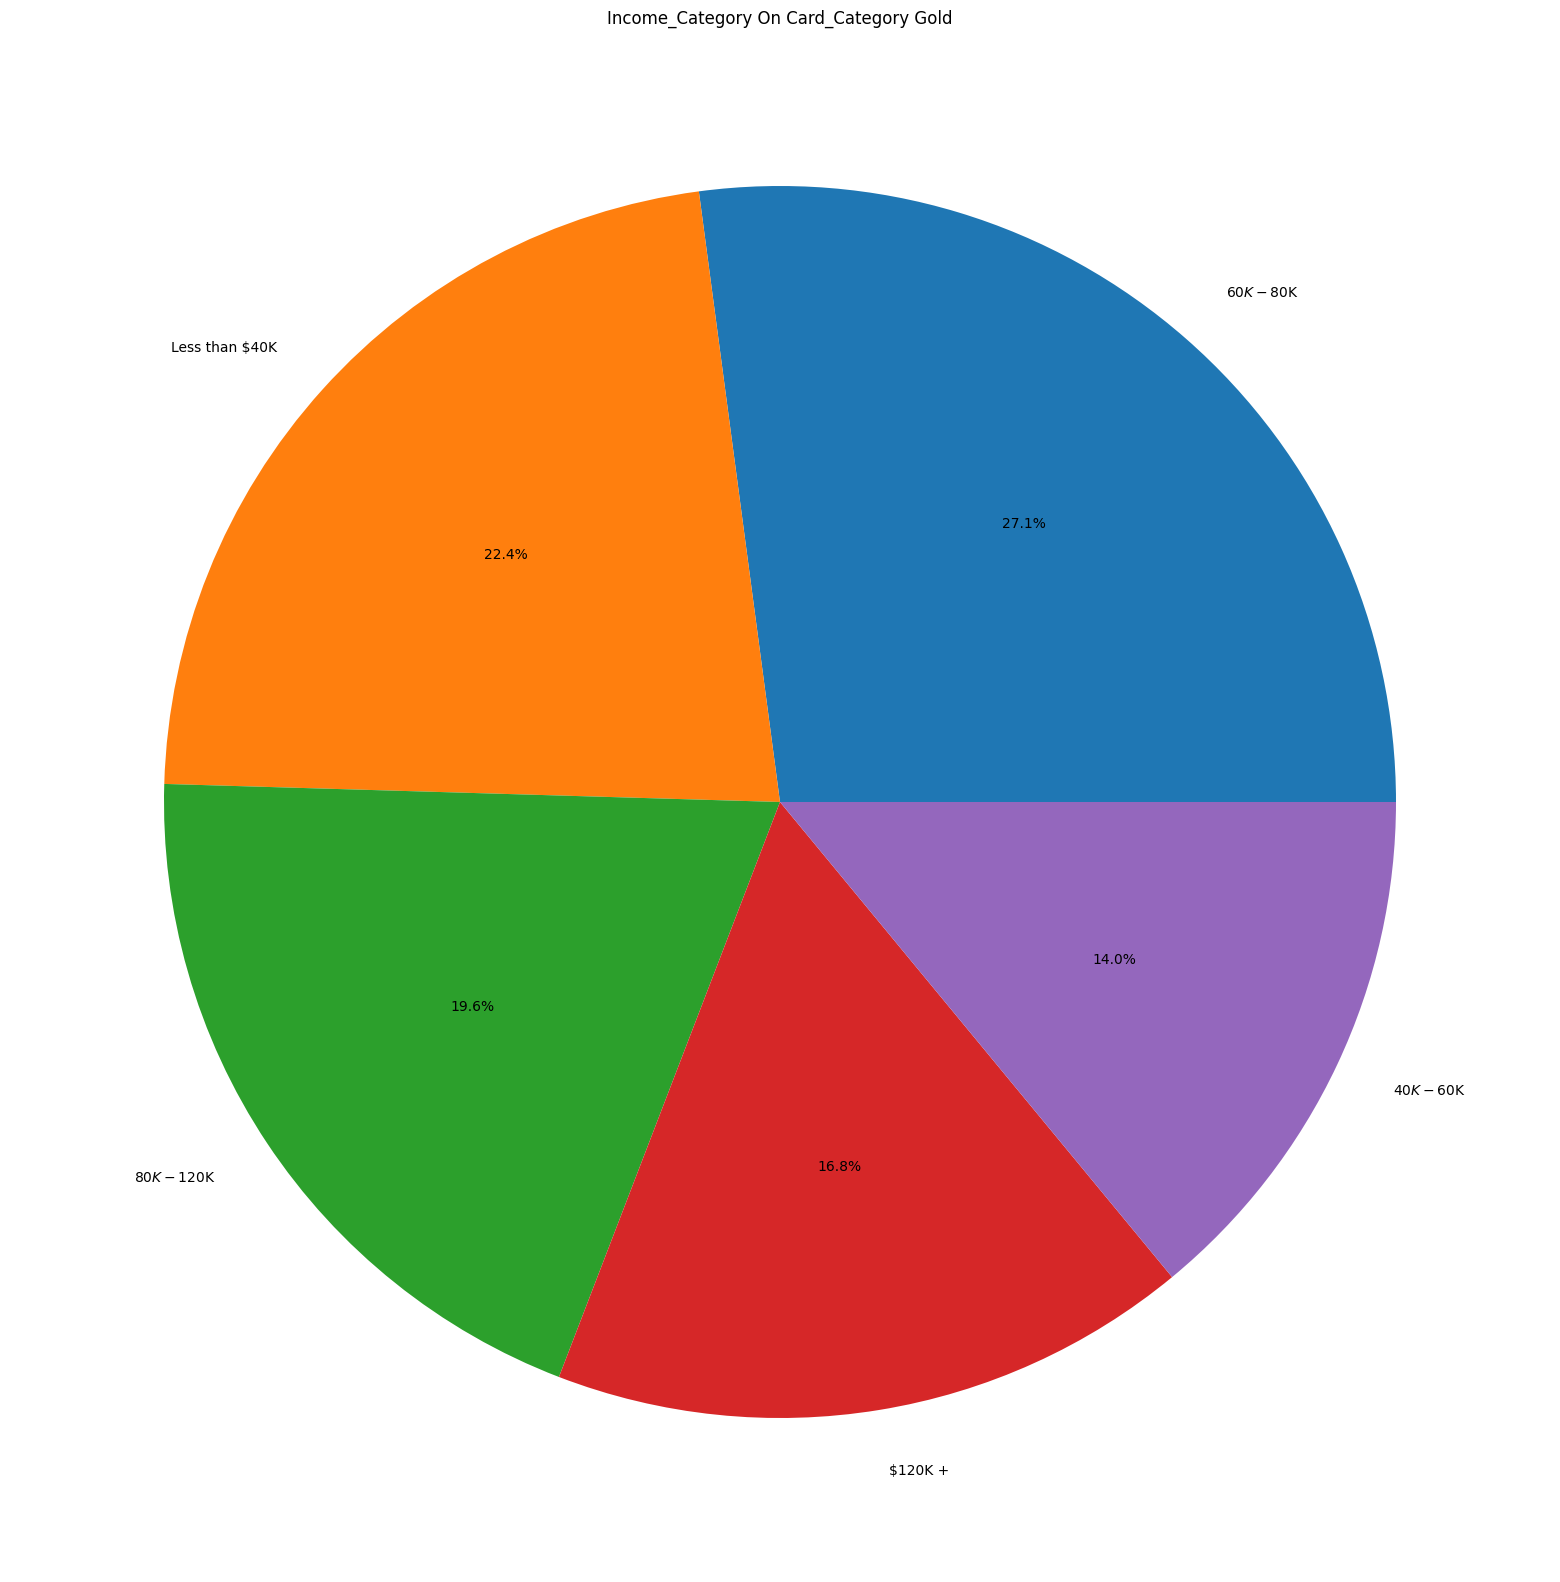

In [ ]:
data = df_gold['Income_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Income_Category On Card_Category Gold')
plt.show()

Platinum

In [ ]:
df_platinum = df_eda.loc[df_eda['Card_Category'] == 'Platinum'].reset_index()
df_platinum.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
15,9462,710362233,Existing Customer,48,M,3,NaN,NaN,$80K - $120K,Platinum,...,2,3,34516.0,1723,32793.0,0.628,13853,98,0.782,0.050
16,9550,709814883,Existing Customer,45,F,2,High School,Single,Less than $40K,Platinum,...,3,1,15987.0,2262,13725.0,0.714,15513,127,0.649,0.141
17,9618,794494308,Existing Customer,42,M,3,Uneducated,Married,$120K +,Platinum,...,4,3,34516.0,2070,32446.0,0.880,13781,102,0.545,0.060
18,9828,709969758,Existing Customer,43,M,3,Graduate,Single,$60K - $80K,Platinum,...,3,3,34516.0,1774,32742.0,0.667,13966,115,0.667,0.051
19,9858,714949758,Existing Customer,51,F,3,Graduate,Single,NaN,Platinum,...,1,4,34516.0,1913,32603.0,0.851,16712,123,0.708,0.055


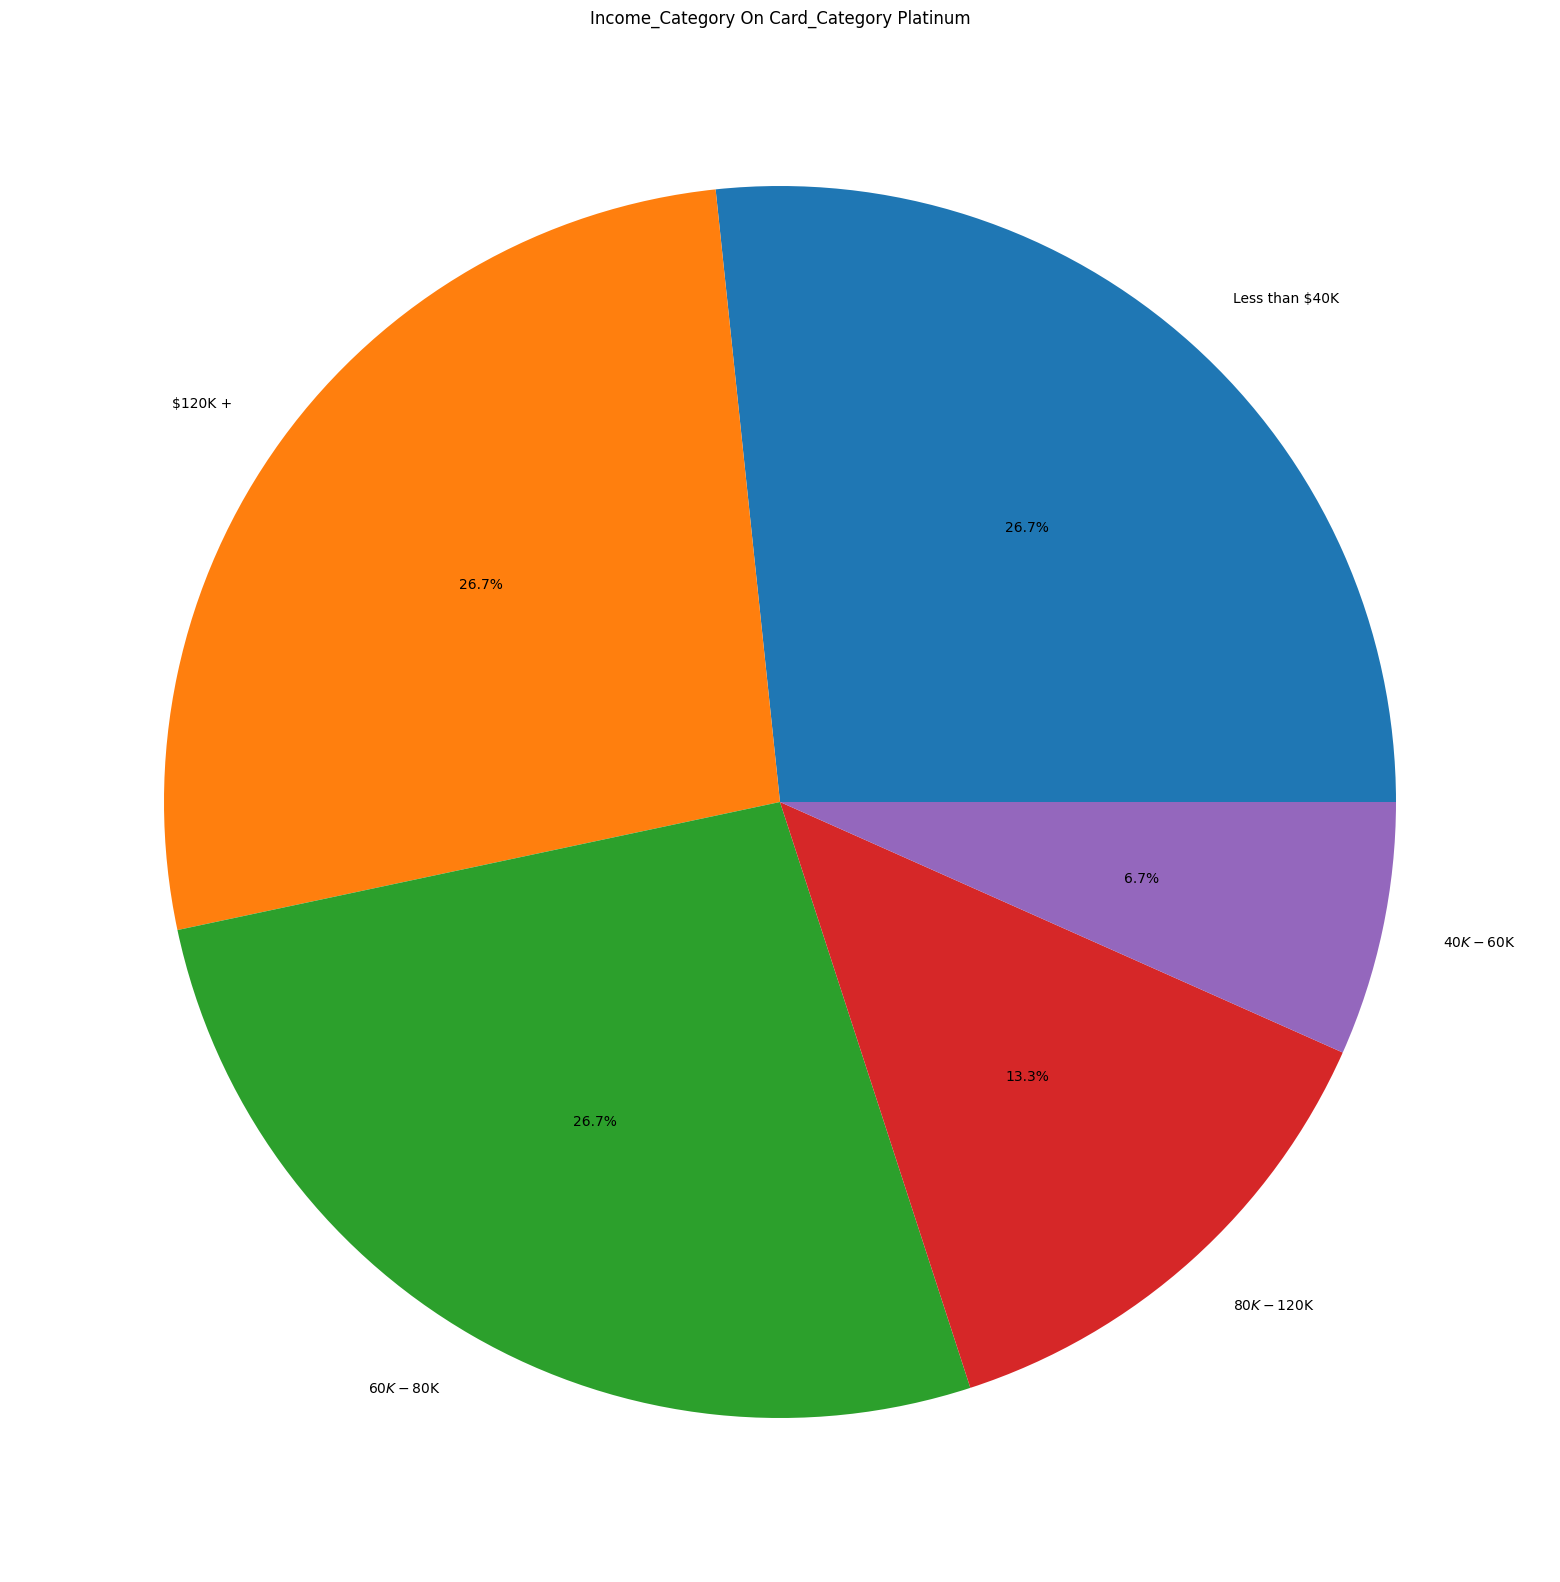

In [ ]:
data = df_platinum['Income_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Income_Category On Card_Category Platinum')
plt.show()

$120K +

In [ ]:
df_120 = df_eda.loc[df_eda['Income_Category'] == '$120K +'].reset_index()
df_120.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
722,10050,720128658,Attrited Customer,49,M,1,Uneducated,Single,$120K +,Blue,...,3,3,5181.0,0,5181.0,0.830,8943,68,1.000,0.000
723,10057,718043583,Existing Customer,50,M,2,Uneducated,Single,$120K +,Blue,...,3,4,21794.0,1368,20426.0,0.691,15111,116,0.706,0.063
724,10085,717714633,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,...,3,4,14938.0,0,14938.0,0.737,15277,131,0.724,0.000
725,10098,716644008,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,...,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
726,10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,...,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000


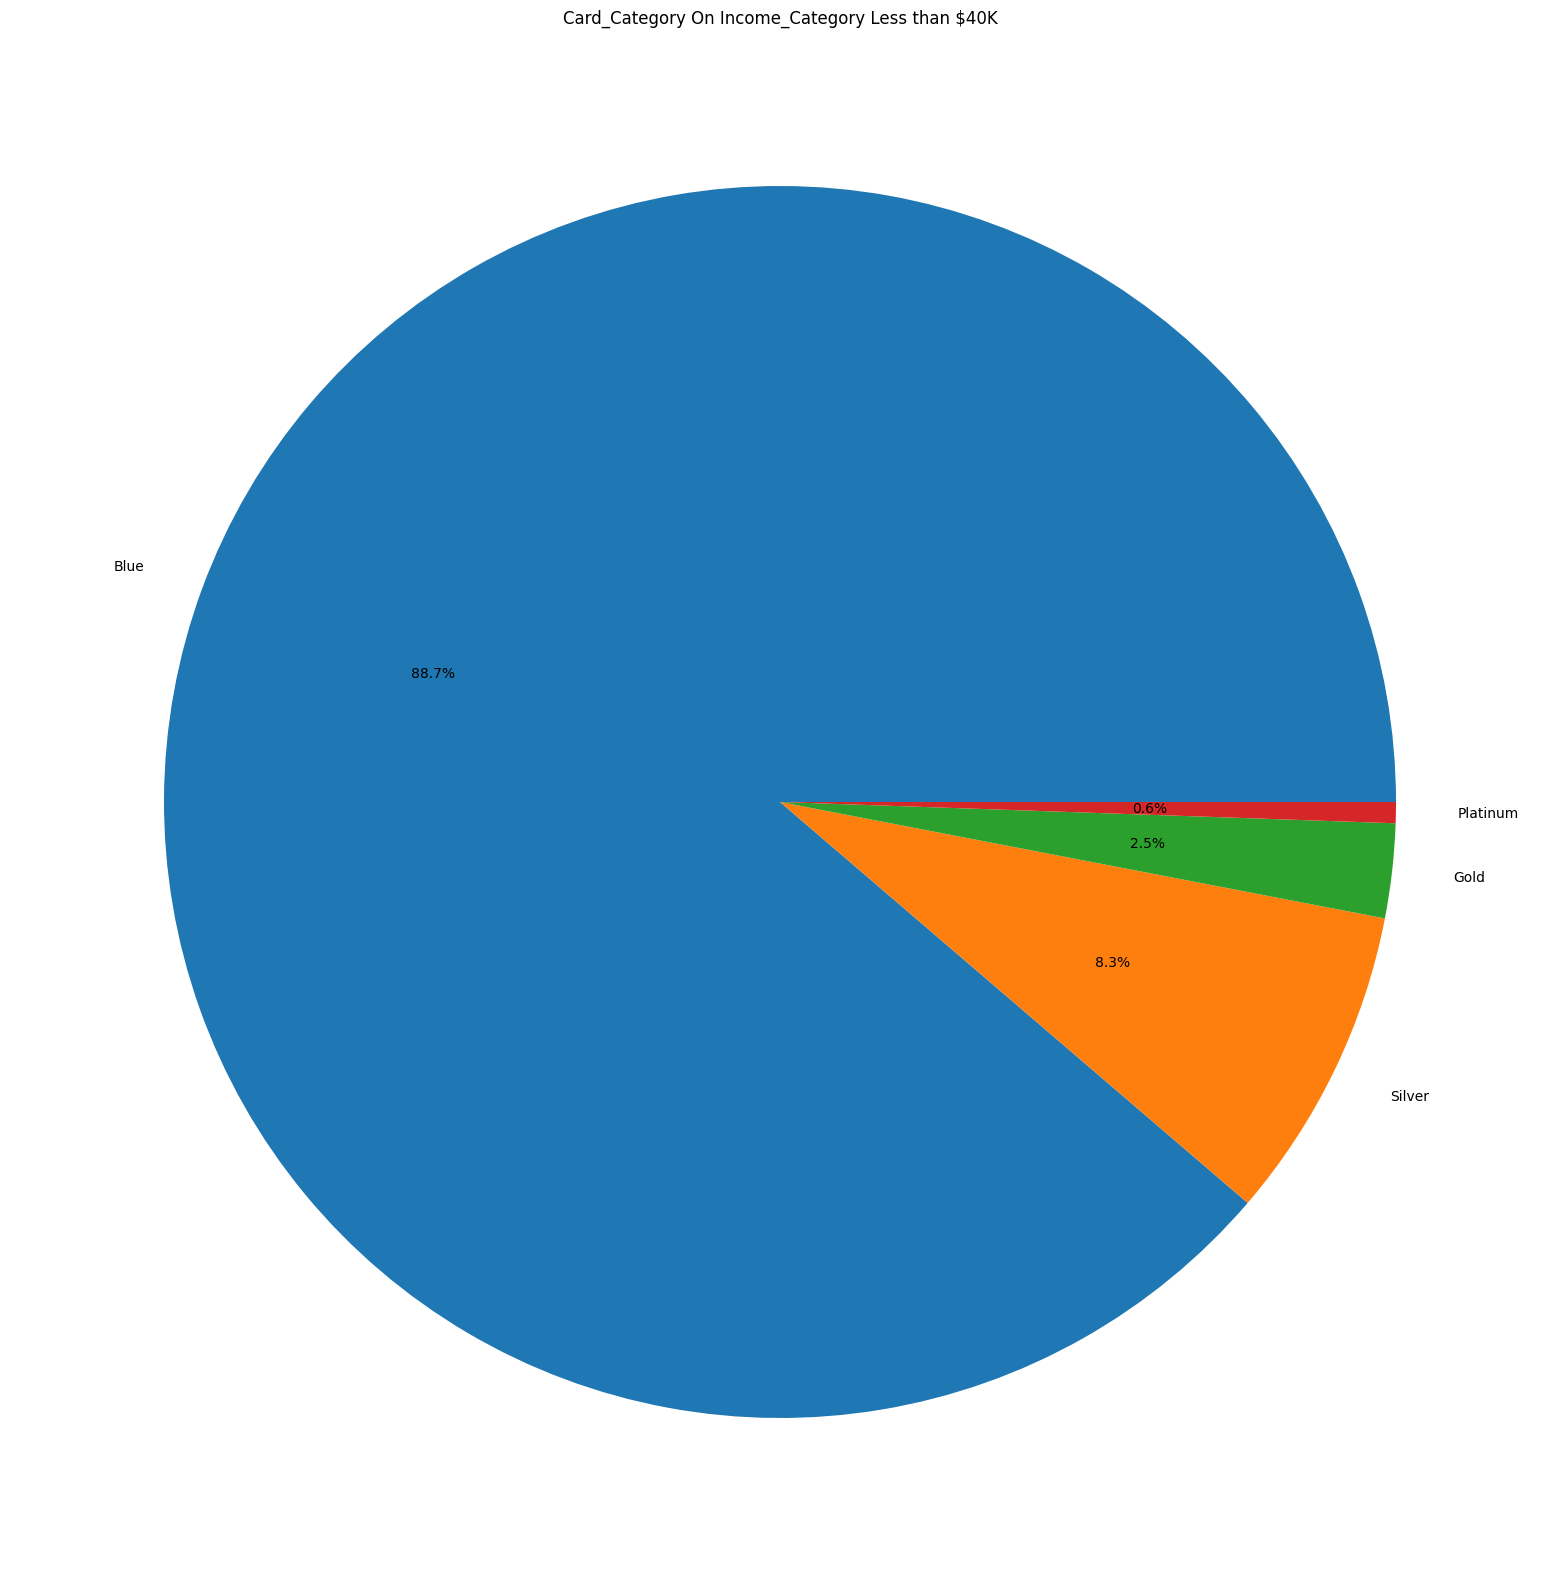

In [ ]:
data = df_120['Card_Category'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Card_Category On Income_Category Less than $40K')
plt.show()

#### **Apakah nasabah yang tidak aktif selama kurang dari 3 bulan dalam kurun waktu 12 bulan memiliki saldo diatas rata-rata?**

In [ ]:
df_4 = df_eda.copy()

In [ ]:
mean = df_4['Total_Revolving_Bal'].mean()
mean

1162.8140614199665

In [ ]:
df_4['High_Total_Revolving_Bal'] = None
df_4['High_Total_Revolving_Bal'].loc[df_4['Total_Revolving_Bal'] > mean] = 'Yes'
df_4['High_Total_Revolving_Bal'].loc[df_4['Total_Revolving_Bal'] <= mean] = 'No'
df_4.tail()

<ipython-input-42-3887c76113c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['High_Total_Revolving_Bal'].loc[df_4['Total_Revolving_Bal'] > mean] = 'Yes'
<ipython-input-42-3887c76113c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['High_Total_Revolving_Bal'].loc[df_4['Total_Revolving_Bal'] <= mean] = 'No'


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,High_Total_Revolving_Bal
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Yes
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Yes
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,No
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,No
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,Yes


In [ ]:
df_inactive_less_3 = df_4.loc[df_4['Months_Inactive_12_mon'] < 3].reset_index()
df_inactive_less_3.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,High_Total_Revolving_Bal
5539,10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,...,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,Yes
5540,10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,...,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,No
5541,10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Yes
5542,10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Yes
5543,10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,Yes


In [ ]:
df_inactive_more_3 = df_4.loc[df_4['Months_Inactive_12_mon'] >= 3].reset_index()
df_inactive_more_3.tail()

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,High_Total_Revolving_Bal
4578,10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,...,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,Yes
4579,10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,...,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,No
4580,10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,NaN,Blue,...,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,Yes
4581,10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,No
4582,10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,No


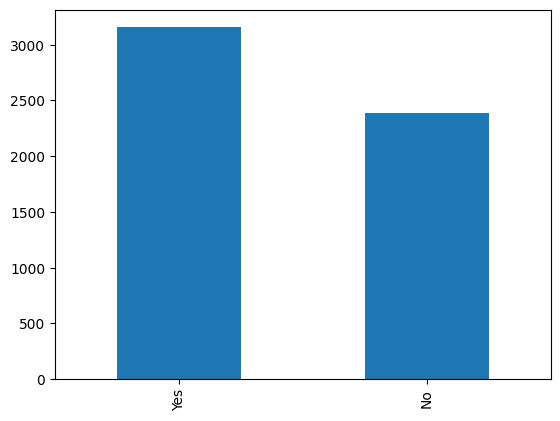

In [ ]:
df_inactive_less_3['High_Total_Revolving_Bal'].value_counts().plot(kind='bar');

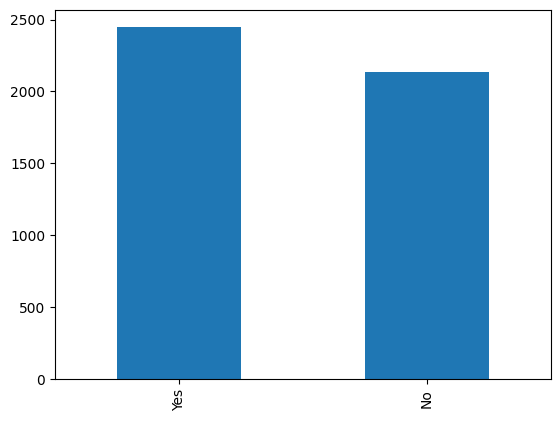

In [ ]:
df_inactive_more_3['High_Total_Revolving_Bal'].value_counts().plot(kind='bar');

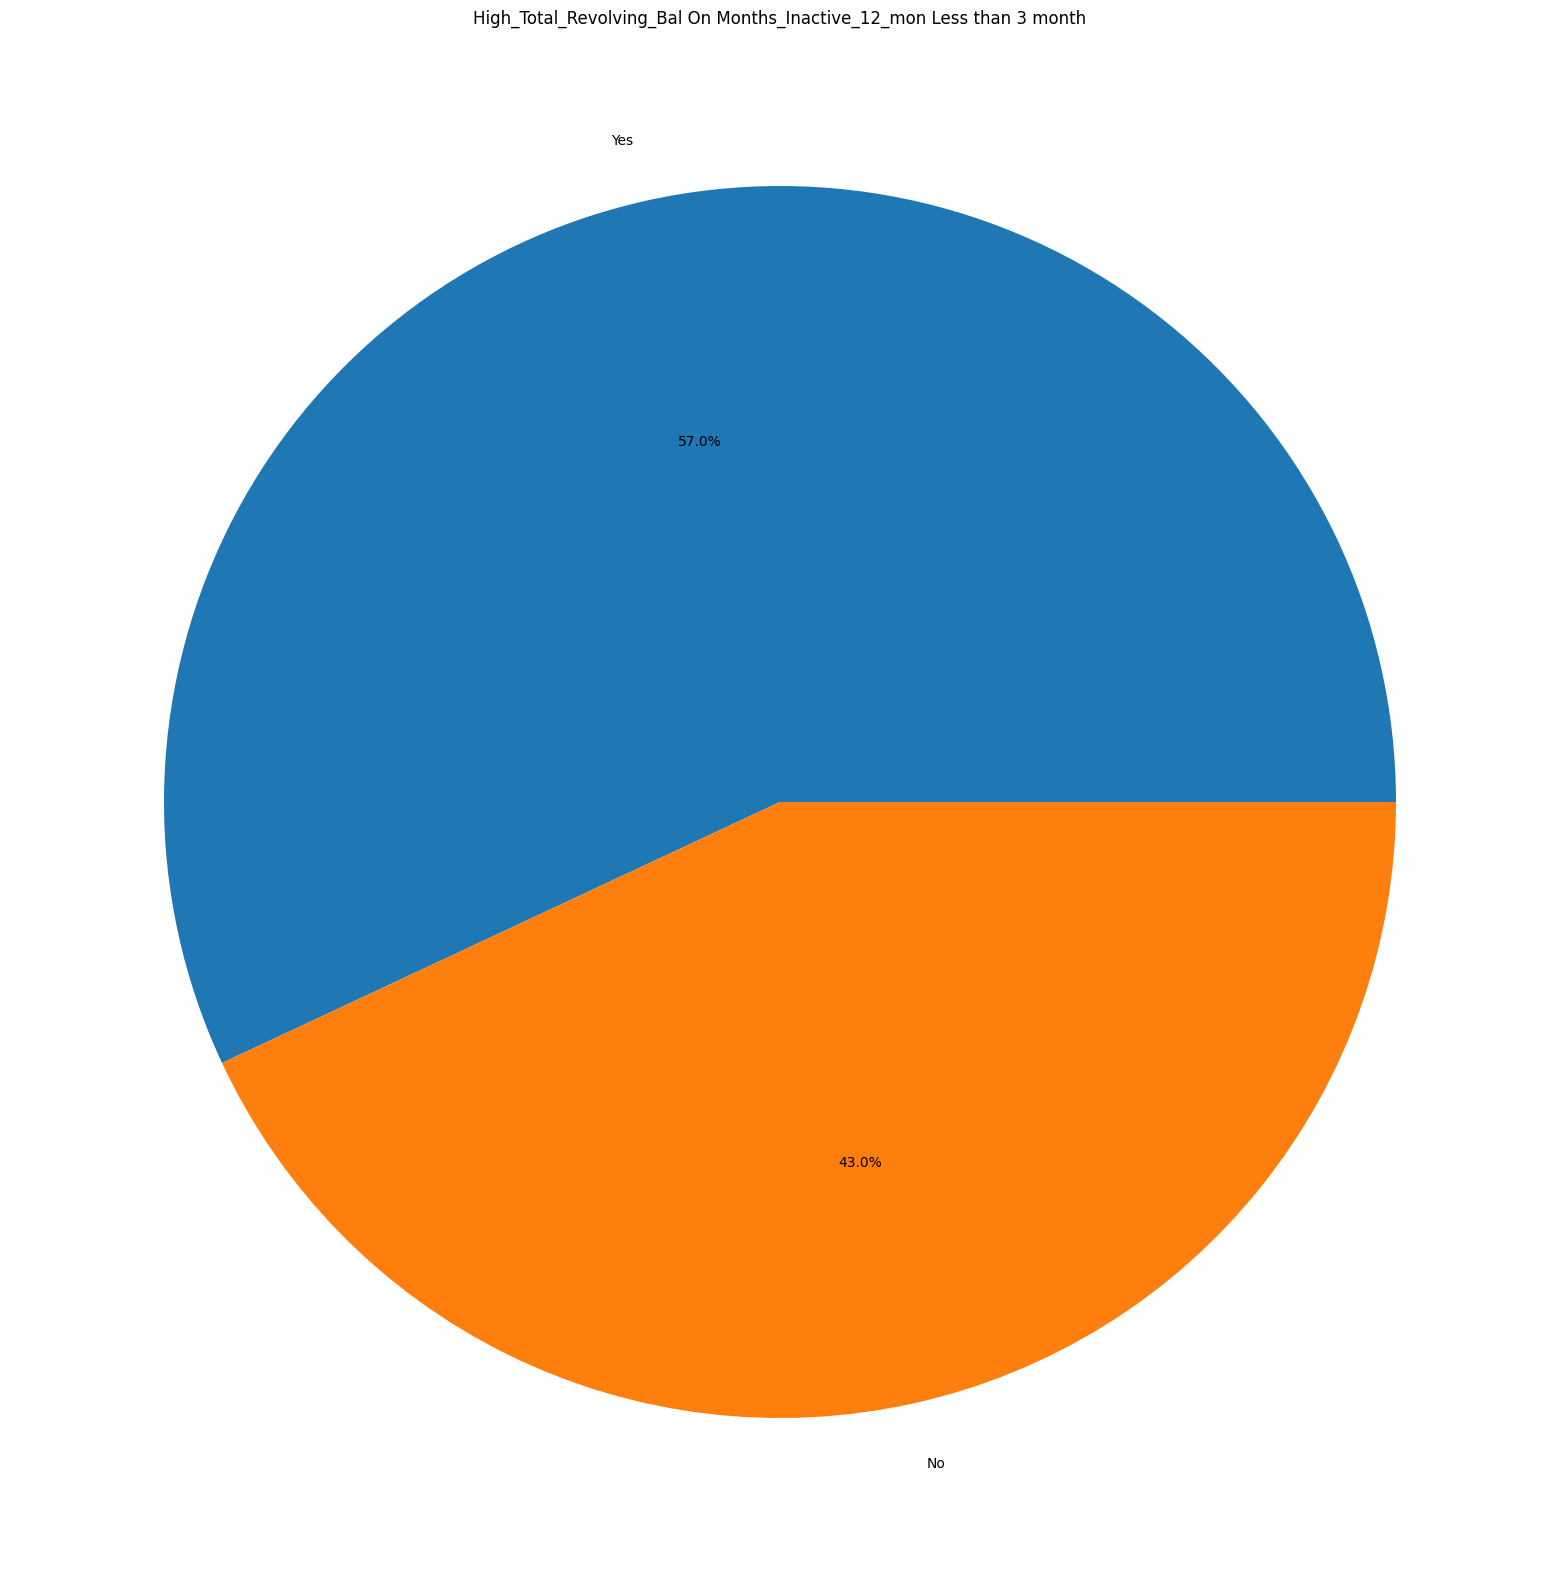

In [ ]:
data = df_inactive_less_3['High_Total_Revolving_Bal'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('High_Total_Revolving_Bal On Months_Inactive_12_mon Less than 3 month')
plt.show()

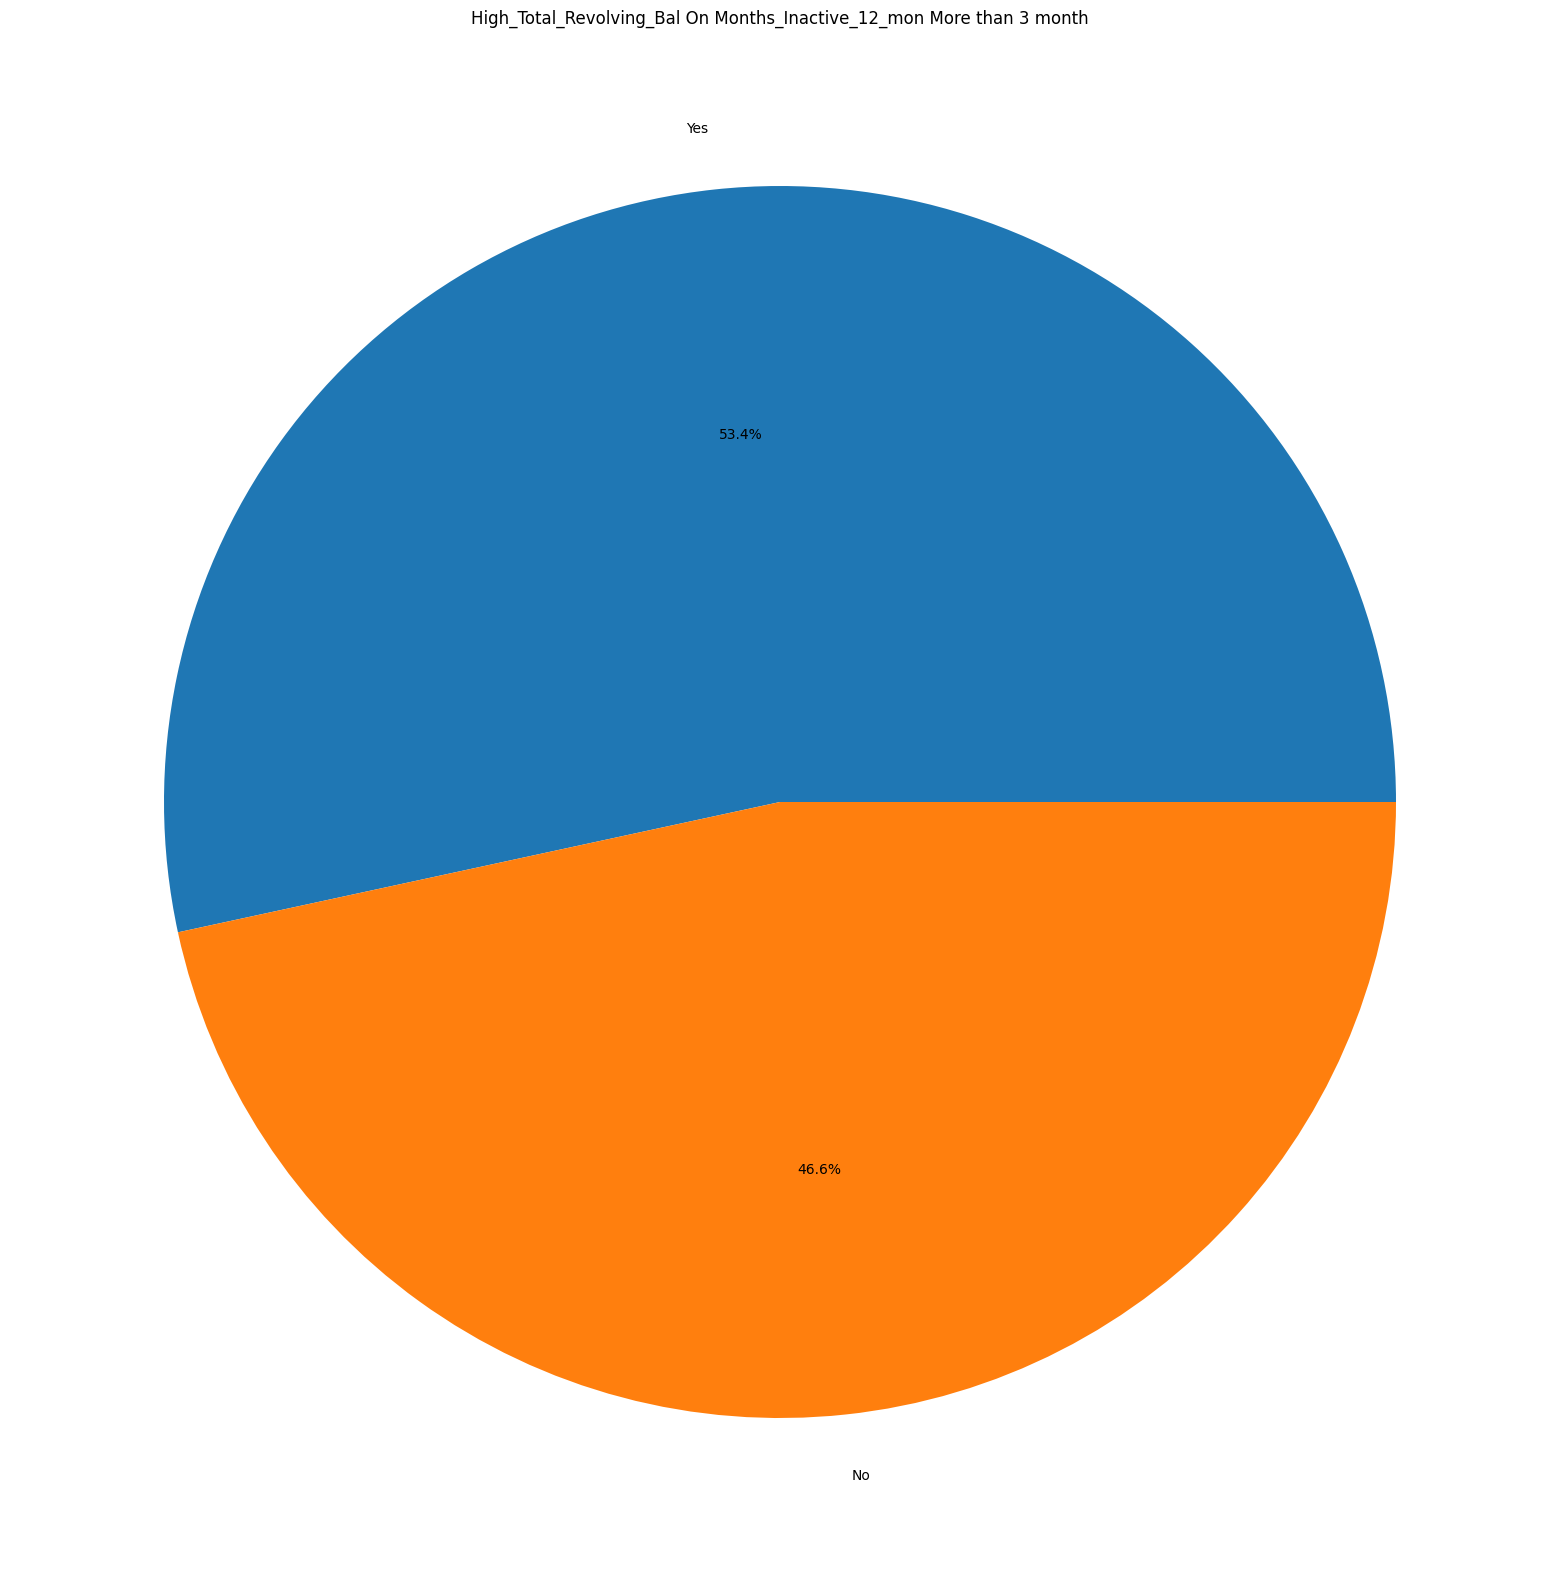

In [ ]:
data = df_inactive_more_3['High_Total_Revolving_Bal'].value_counts()
plt.figure(figsize=(20,20))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('High_Total_Revolving_Bal On Months_Inactive_12_mon More than 3 month')
plt.show()

#### **Apakah jumlah tanggungan seorang nasabah dapat mempengaruhi limit dari kartu kredit nasabah tersebut?**

In [ ]:
df_mean = df_eda.groupby('Dependent_count').mean().reset_index()
df_mean

<ipython-input-49-9d4ac155c20b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_eda.groupby('Dependent_count').mean().reset_index()


,Dependent_count,CLIENTNUM,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,7.388813e+08,48.326327,37.658186,3.951327,2.332965,2.561947,7160.763717,1146.824115,6013.939602,0.775296,4110.331858,61.711283,0.711486,0.294683
1,1,7.380434e+08,47.705658,37.026659,3.880849,2.372144,2.503808,7905.123449,1199.165397,6705.958052,0.773307,4411.088139,64.054407,0.708548,0.295280
2,2,7.397155e+08,46.291902,35.918267,3.798493,2.332957,2.440678,8717.175292,1150.825612,7566.349680,0.756367,4475.953296,65.430132,0.715064,0.270859
3,3,7.396807e+08,45.513543,35.281845,3.780015,2.345900,2.451684,8976.506589,1149.539531,7826.967057,0.753557,4309.106515,64.628843,0.705321,0.263641
4,4,7.387695e+08,45.319568,35.005083,3.787166,2.336086,2.383736,9454.955019,1163.992376,8290.962643,0.758571,4469.992376,65.770013,0.719022,0.267874
5,5,7.396312e+08,45.264151,35.136792,3.613208,2.264151,2.398585,9110.453302,1195.554245,7914.899057,0.737854,4917.356132,69.575472,0.731156,0.268158


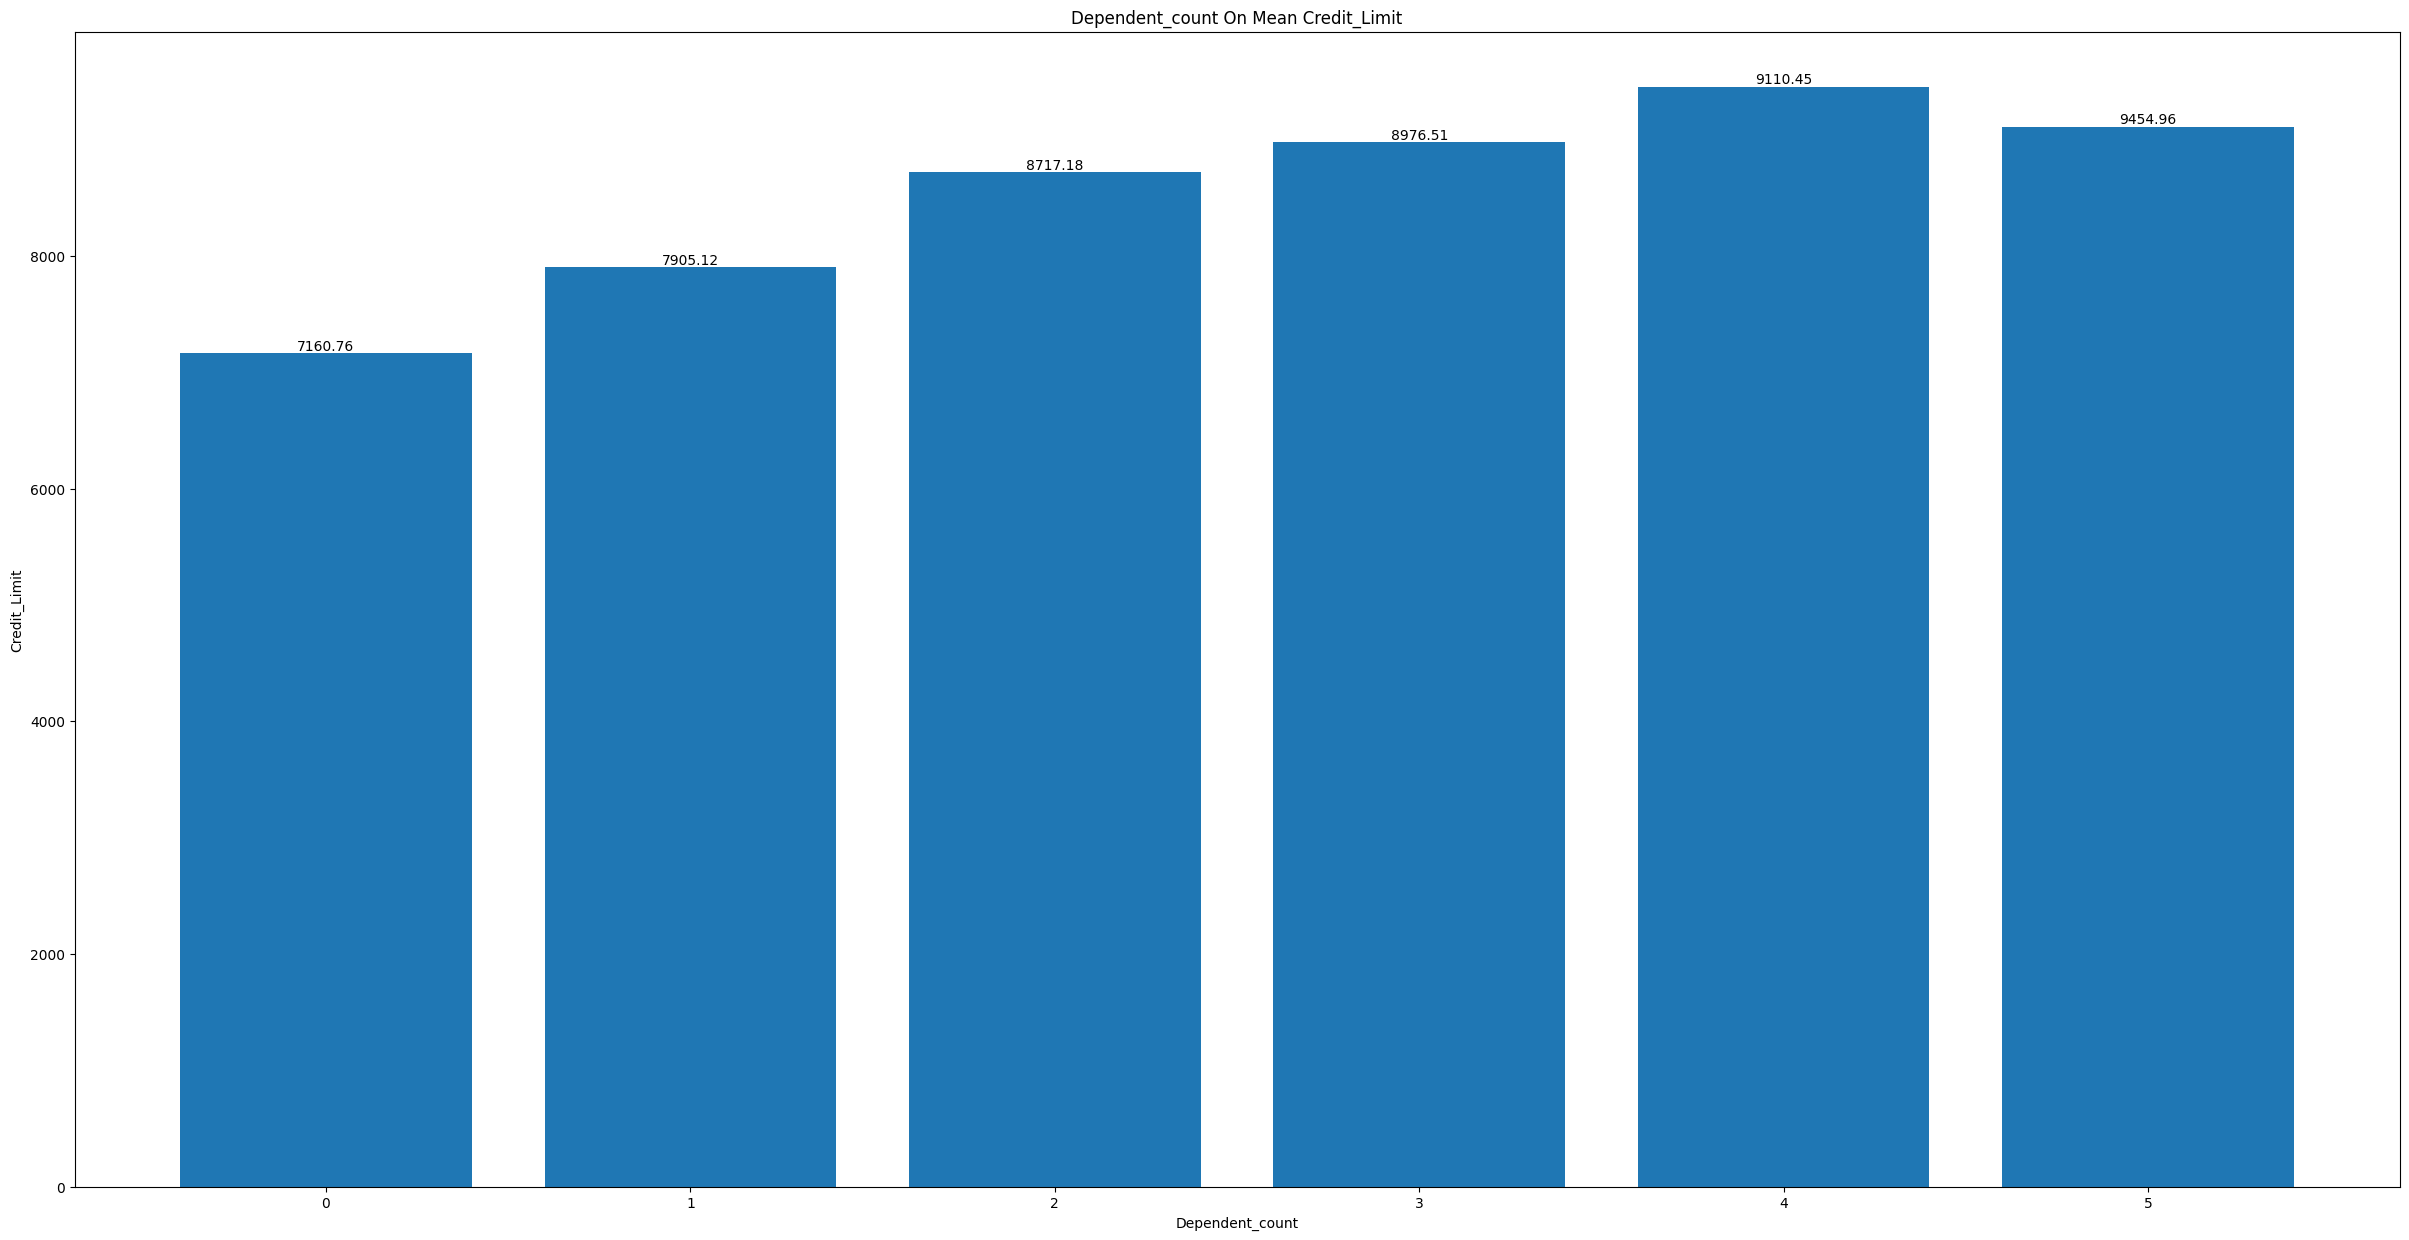

In [ ]:
data = df_mean.sort_values(by='Credit_Limit')
fig = plt.figure(figsize = (30, 15))
bars = plt.bar(data['Dependent_count'], data['Credit_Limit'])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(data['Credit_Limit'][i], 2)), ha='center', va='bottom')

plt.xlabel("Dependent_count")
plt.ylabel('Credit_Limit')
plt.title('Dependent_count On Mean Credit_Limit')
plt.show()

## Data Preparation

In [ ]:
df_bank = df_bank.drop(['CLIENTNUM'], axis=1)

In [ ]:
def unknown(column):
  lst = []
  for i in df_bank[column]:
    if i == 'Unknown':
      i = None
    lst.append(i)
  df_bank[column] = lst

### Data Cleaning

#### Missing Value

In [ ]:
cek_null(df_bank)

                 Total   Percent
Marital_Status     749  0.073961
Income_Category   1112  0.109805
Education_Level   1519  0.149995


In [ ]:
df_bank = df_bank.fillna("Unknown")

In [ ]:
cek_null(df_bank)

Tidak ditemukan missing value pada dataset


In [ ]:
df_bank.shape

(7081, 20)

#### Duplicate Data

In [ ]:
df_bank.duplicated().sum()

0

#### Outliers Data

In [ ]:
# Melihat jumlah outlier

Jumlah_Outlier = []

for i in df_bank.columns:

  # Melakukan looping untuk mencari outlier setiap kolom yang isinya bukan tipe data object
  if (df_bank[i].dtypes != 'object'):
    data = df_bank[i]

    # Mencari nilai IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Mencari RUB dan RLB
    RLB = Q1 - 1.5 * IQR
    RUB = Q3 + 1.5 * IQR

    # Mencari banyak outlier
    outlier_lower = data[data < RLB]
    outlier_upper = data[data > RUB]
    jumlah_outlier = len(outlier_lower) + len(outlier_upper)
    persentase_outlier = jumlah_outlier/len(df_bank)

    Jumlah_Outlier.append([i, jumlah_outlier, persentase_outlier])

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Jumlah Outliers','Persentase Outliers']).sort_values(by=['Jumlah Outliers'], ascending = False,ignore_index=True)

,Column,Jumlah Outliers,Persentase Outliers
0,Credit_Limit,715,0.100974
1,Avg_Open_To_Buy,710,0.100268
2,Total_Trans_Amt,624,0.088123
3,Contacts_Count_12_mon,449,0.063409
4,Total_Amt_Chng_Q4_Q1,293,0.041378
5,Total_Ct_Chng_Q4_Q1,273,0.038554
6,Months_on_book,256,0.036153
7,Months_Inactive_12_mon,223,0.031493
8,Customer_Age,2,0.000282
9,Dependent_count,0,0.000000


Tergolong normal, tidak perlu dilakukan apapun pada outliers data

### Labeling Data Categorical

In [ ]:
def categorical(column):
  le = LabelEncoder()
  df_bank[column] = le.fit_transform(df_bank[column])

In [ ]:
for i in df_bank.columns:
  if df_bank[i].dtypes == object:
    categorical(i)

## Modeling

### Classification

In [ ]:
def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["precision-weighted"] = precision_score(y_test, y_pred, average='weighted')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score-weighted"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores

    return model_scores

In [ ]:
df_classification = df_bank.copy()

In [ ]:
df_norm_classification_1 = df_classification.drop(['Attrition_Flag'], axis=1)
df_classification[df_norm_classification_1.columns] = MinMaxScaler().fit_transform(df_norm_classification_1)
df_norm_classification_1 = df_classification.copy()

df_norm_classification_1.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10120,1,0.595745,1.0,0.2,0.6,1.0,0.50,0.0,0.488372,0.8,0.333333,0.000000,0.377949,0.837902,0.342711,0.194289,0.861710,0.838710,0.203016,0.151151
10121,1,0.638298,0.0,0.2,0.4,1.0,1.00,0.0,0.860465,0.6,0.166667,0.666667,0.068013,0.240763,0.089213,0.167795,0.805605,0.887097,0.212978,0.164164
10122,1,0.510638,1.0,0.4,0.4,1.0,0.25,0.0,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,0.206947,0.855934,0.862903,0.230749,0.462462
10124,0,0.382979,0.0,0.2,0.6,0.5,1.00,0.0,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.241095,0.559394,0.403226,0.220248,0.000000
10126,0,0.361702,0.0,0.4,0.4,0.5,1.00,1.0,0.279070,1.0,0.333333,0.666667,0.270566,0.779102,0.244082,0.206947,0.559565,0.411290,0.174744,0.189189


In [ ]:
X = df_norm_classification_1.drop(['Attrition_Flag'], axis=1)
y_1 = df_norm_classification_1['Attrition_Flag']

In [ ]:
counter_y_1 = Counter(y_1)
print(counter_y_1)

Counter({1: 5968, 0: 1113})


Text(0.5, 1.0, 'Matriks Korelasi Pearson')

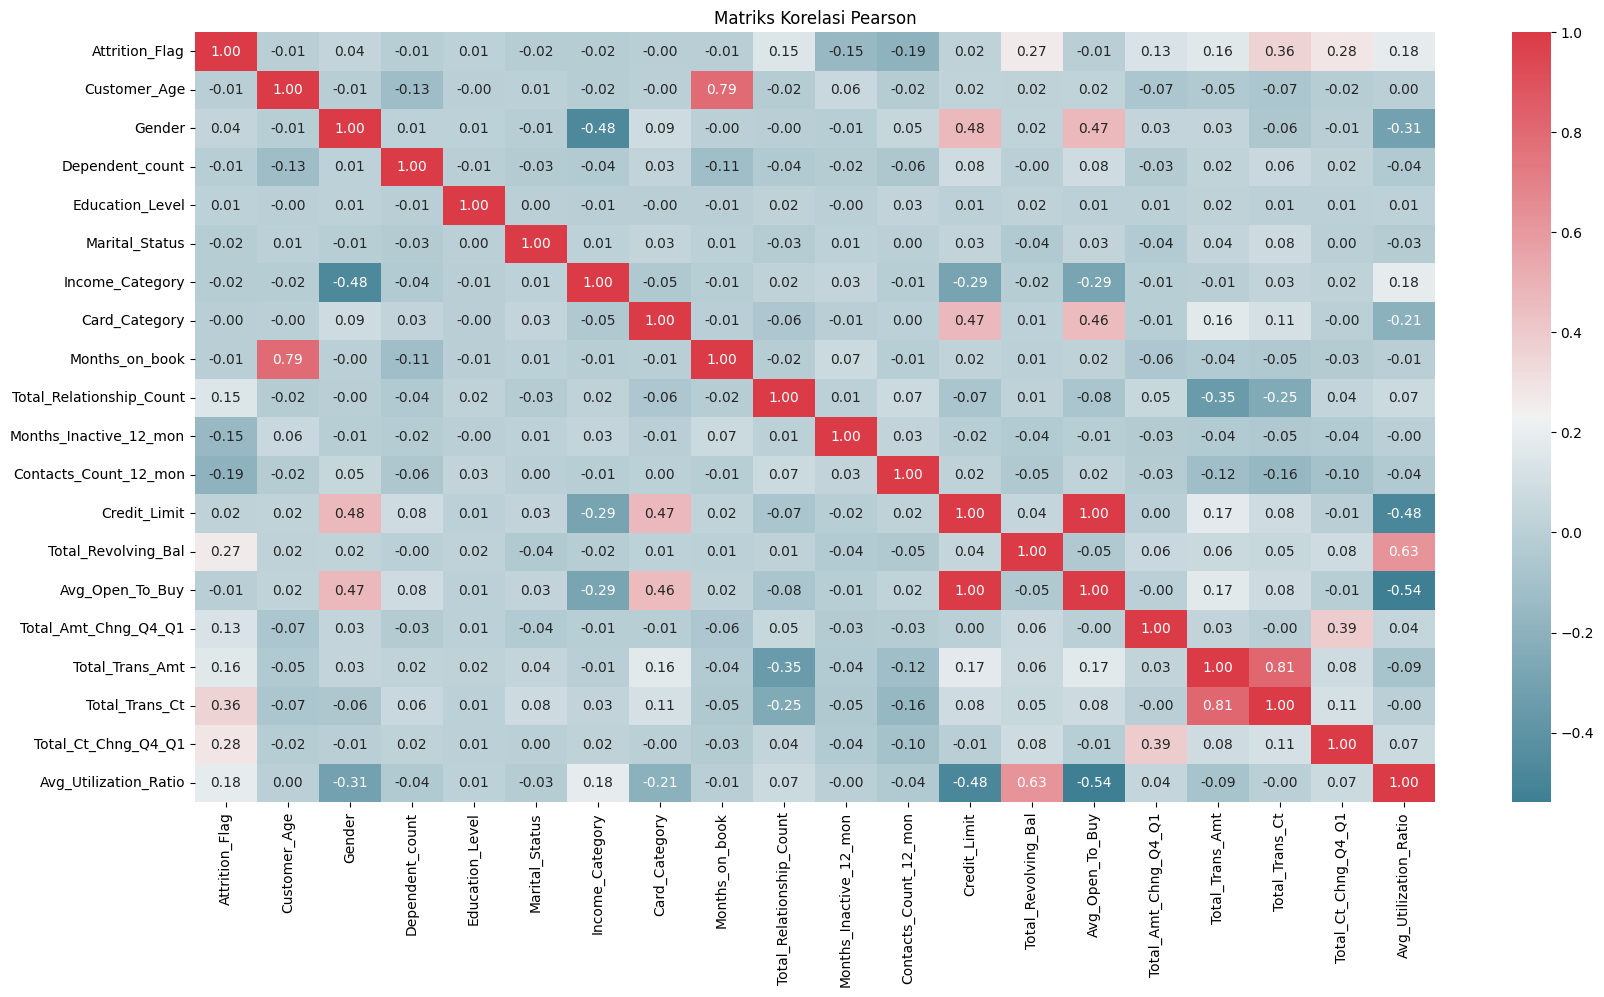

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(df_norm_classification_1.corr(), vmin=None, vmax=None,
                cmap=sns.diverging_palette(220, 10, as_cmap=True), center=None,
                robust=False, annot=True,
                fmt='.2f', annot_kws=None,
                linewidths=0, linecolor='white',
                cbar_kws=None, cbar_ax=None, square=False,
                xticklabels='auto', yticklabels='auto',
                mask=None, ax=None)

plt.title("Matriks Korelasi Pearson")

In [ ]:
X = X.drop(['Avg_Open_To_Buy'], axis=1)

In [ ]:
X.shape

(7081, 18)

#### Feature Selection

In [ ]:
model_scores = {}

In [ ]:
def feature_imbalanced(name, model):

  cv_classification = KFold(random_state=2110, shuffle=True)
  max_mean = 0
  max_param = None
  scores_list = []

  X_model, y_model = model.fit_resample(X, y_1)

  print(Counter(y_model))

  for i in range(2, 18):
    score_list = []

    selector = SelectKBest(k=i)
    Xi = selector.fit_transform(X_model, y_model)

    print(selector.get_feature_names_out(input_features=selector.feature_names_in_))

    #Decision Tree
    dtc = DecisionTreeClassifier()
    scores = cross_val_score(dtc, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Decision Tree Classifier:", np.mean(scores))
    score_list.append(np.mean(scores))

    #Random Forest
    rfc = RandomForestClassifier()
    scores = cross_val_score(rfc, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Random Forest Classifier:", np.mean(scores))
    score_list.append(np.mean(scores))

    #Gaussian Naive Bayes
    nb = GaussianNB()
    scores = cross_val_score(nb, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Naive Bayes:", np.mean(scores))
    score_list.append(np.mean(scores))

    #KNN
    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score KNN:", np.mean(scores))
    score_list.append(np.mean(scores))

    #Softmax
    sofreg = LogisticRegression(multi_class='multinomial', max_iter=200)
    scores = cross_val_score(sofreg, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Softmax:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #Linear SVC
    lin_svc = LinearSVC()
    scores = cross_val_score(lin_svc, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Linear SVC:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #SVC
    svc = SVC()
    scores = cross_val_score(svc, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score SVC :", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #Percepton
    percepton = Perceptron()
    scores = cross_val_score(percepton, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Percepton:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #SGD
    sgd = SGDClassifier()
    scores = cross_val_score(sgd, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score SGD:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #XGB
    xgb = XGBClassifier()
    scores = cross_val_score(xgb, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score XGB:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #Adaboost
    adaboost = AdaBoostClassifier()
    scores = cross_val_score(adaboost, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score Adaboost:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    #GradientBoostingClassifier
    grad_boost = GradientBoostingClassifier()
    scores = cross_val_score(grad_boost, Xi, y_model, scoring='f1_weighted', cv=cv_classification)
    print("Score GradientBoostingClassifier:", np.mean(scores))
    score_list.append(np.mean(scores))
    scores_list.append(score_list)

    if np.mean(score_list) > max_mean:
      max_mean = np.mean(score_list)
      max_param = selector.get_feature_names_out(input_features=selector.feature_names_in_)
    print()

  scores = {}
  scores["max_param"] = max_param

  model_scores[name] = scores

In [ ]:
feature_imbalanced("SMOTE", SMOTE())

Counter({1: 5968, 0: 5968})
['Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.8782147858905397
Score Random Forest Classifier: 0.8818676161390103
Score Naive Bayes: 0.8019058036015154
Score KNN: 0.8090591782448462
Score Softmax: 0.7914213808383451
Score Linear SVC: 0.7918368049485406
Score SVC : 0.8105929815150541
Score Percepton: 0.5132772518490534
Score SGD: 0.790704277640572
Score XGB: 0.9033911806367468
Score Adaboost: 0.8050817046415407
Score GradientBoostingClassifier: 0.8335279400668254

['Total_Revolving_Bal' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.8419791051598373
Score Random Forest Classifier: 0.8753284116502638
Score Naive Bayes: 0.8153544288630623
Score KNN: 0.8491523394569068
Score Softmax: 0.7892929186447363
Score Linear SVC: 0.7913015973761051
Score SVC : 0.8386228728091035
Score Percepton: 0.6716715249822898
Score SGD: 0.7890333410386605
Score XGB: 0.9191466785567307
Score Adaboost: 0.8452497431457526
Score Gra

In [ ]:
feature_imbalanced("Random Oversampling", RandomOverSampler(sampling_strategy='minority'))

Counter({1: 5968, 0: 5968})
['Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.8232512741118342
Score Random Forest Classifier: 0.822745916444315
Score Naive Bayes: 0.7796988533659734
Score KNN: 0.7468668419801302
Score Softmax: 0.7756816812755091
Score Linear SVC: 0.775339538641275
Score SVC : 0.794121688176982
Score Percepton: 0.6117912379337297
Score SGD: 0.7747110647667412
Score XGB: 0.822563597545202
Score Adaboost: 0.7896802738953993
Score GradientBoostingClassifier: 0.8055987761714368

['Total_Revolving_Bal' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.9369951884116595
Score Random Forest Classifier: 0.942256807707644
Score Naive Bayes: 0.7954200761009982
Score KNN: 0.8802382900617198
Score Softmax: 0.768826044978461
Score Linear SVC: 0.7730926639894553
Score SVC : 0.8222837380629106
Score Percepton: 0.7435175605395031
Score SGD: 0.7710714578816236
Score XGB: 0.921457484797424
Score Adaboost: 0.8264154073385412
Score GradientB

In [ ]:
feature_imbalanced("Borderline-SMOTE", BorderlineSMOTE())

Counter({1: 5968, 0: 5968})
['Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.8773795402558185
Score Random Forest Classifier: 0.8817681440215827
Score Naive Bayes: 0.788718697560336
Score KNN: 0.8056536742215687
Score Softmax: 0.776529447139598
Score Linear SVC: 0.7765241153037588
Score SVC : 0.800564874391991
Score Percepton: 0.6924066408663788
Score SGD: 0.7720472652982316
Score XGB: 0.9049800746487451
Score Adaboost: 0.7932125555348141
Score GradientBoostingClassifier: 0.8241420060947761

['Total_Revolving_Bal' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.8510409547656129
Score Random Forest Classifier: 0.8745031790609163
Score Naive Bayes: 0.8013803422696748
Score KNN: 0.8438355630464063
Score Softmax: 0.7768814316638907
Score Linear SVC: 0.7785538023221733
Score SVC : 0.8324873881892305
Score Percepton: 0.7102999464167405
Score SGD: 0.7813926414125427
Score XGB: 0.9179752562520683
Score Adaboost: 0.828127883434342
Score Gradie

In [ ]:
feature_imbalanced("Borderline Oversampling with SVM", SVMSMOTE())

Counter({1: 5968, 0: 5968})
['Total_Revolving_Bal' 'Total_Trans_Ct']
Score Decision Tree Classifier: 0.8676637283993696
Score Random Forest Classifier: 0.87569177167113
Score Naive Bayes: 0.777637255122039
Score KNN: 0.8153543175214526
Score Softmax: 0.7604478965835163
Score Linear SVC: 0.7593156171667091
Score SVC : 0.8261561700371705
Score Percepton: 0.7641929176506881
Score SGD: 0.7639417675891853
Score XGB: 0.9120128532364999
Score Adaboost: 0.8374369899875518
Score GradientBoostingClassifier: 0.864355070969199

['Total_Revolving_Bal' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.843078041429826
Score Random Forest Classifier: 0.8724845257206612
Score Naive Bayes: 0.8086790628532838
Score KNN: 0.8509998638211055
Score Softmax: 0.7834976631891933
Score Linear SVC: 0.7852425462371121
Score SVC : 0.8431638424916017
Score Percepton: 0.6794220321986187
Score SGD: 0.7858262363271825
Score XGB: 0.9143664662321209
Score Adaboost: 0.8467516309169163
Score Gradien

In [ ]:
feature_imbalanced("Random Undersampling", RandomUnderSampler(sampling_strategy='majority'))

Counter({0: 1113, 1: 1113})
['Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.7159215231785703
Score Random Forest Classifier: 0.7393968328190663
Score Naive Bayes: 0.7788929054441446
Score KNN: 0.7587939226865629
Score Softmax: 0.7762599793385749
Score Linear SVC: 0.7803172877133522
Score SVC : 0.7888221974400036
Score Percepton: 0.5564331838687078
Score SGD: 0.7719374802833568
Score XGB: 0.7457847641059809
Score Adaboost: 0.7680517486763019
Score GradientBoostingClassifier: 0.7811639659245021

['Total_Revolving_Bal' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.7740229501941351
Score Random Forest Classifier: 0.8077600276758277
Score Naive Bayes: 0.7978046177671143
Score KNN: 0.8198489440607037
Score Softmax: 0.7686676585669613
Score Linear SVC: 0.7744903664159902
Score SVC : 0.8090762343852484
Score Percepton: 0.7620492178022285
Score SGD: 0.7567592363452234
Score XGB: 0.8117447719540346
Score Adaboost: 0.8140723563316037
Score Gr

In [ ]:
feature_imbalanced("NearMiss", NearMiss())

Counter({0: 1113, 1: 1113})
['Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.6783889333841358
Score Random Forest Classifier: 0.70449021776354
Score Naive Bayes: 0.720832710867698
Score KNN: 0.7209337734129595
Score Softmax: 0.7290972141350908
Score Linear SVC: 0.7264206860071429
Score SVC : 0.751188577933039
Score Percepton: 0.4952414709145224
Score SGD: 0.7175838466011044
Score XGB: 0.7286675318599258
Score Adaboost: 0.7538306435105979
Score GradientBoostingClassifier: 0.7635958661015193

['Total_Relationship_Count' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1']
Score Decision Tree Classifier: 0.714063792202883
Score Random Forest Classifier: 0.7686804713117142
Score Naive Bayes: 0.7493268953522805
Score KNN: 0.7821398624706605
Score Softmax: 0.7376154710425322
Score Linear SVC: 0.7376411244938677
Score SVC : 0.7803052790776762
Score Percepton: 0.6694660462315862
Score SGD: 0.7340409012735181
Score XGB: 0.7789434902952405
Score Adaboost: 0.7786789340246598
Score Gr

In [ ]:
data_name = []
data_params = []
for key, value in model_scores.items():
  data_name.append(key)
  data_params.append(list(value.values())[0])

In [ ]:
feature_imbalanced = pd.DataFrame({
    'teknik': data_name,
    'max_param': data_params
})
feature_imbalanced

,teknik,max_param
0,SMOTE,"[Gender, Dependent_count, Total_Relationship_C..."
1,Random Oversampling,"[Gender, Dependent_count, Education_Level, Mar..."
2,Borderline-SMOTE,"[Marital_Status, Card_Category, Total_Relation..."
3,Borderline Oversampling with SVM,"[Gender, Dependent_count, Education_Level, Mar..."
4,Random Undersampling,"[Total_Relationship_Count, Months_Inactive_12_..."
5,NearMiss,"[Gender, Dependent_count, Income_Category, Car..."


#### Sampling

##### Random Oversampling

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Random Oversampling'].values[0]
max_param

array(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({1: 4774, 0: 4774})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.913197,0.915781,0.913197,0.914335
Random Forest,0.950600,0.951188,0.950600,0.950866
Gaussian,0.781934,0.867967,0.781934,0.806940
KNN,0.836274,0.884820,0.836274,0.851132
Softmax Regression,0.834157,0.887904,0.834157,0.850034
LinearSVC,0.831334,0.887769,0.831334,0.847848
SVC,0.887791,0.915135,0.887791,0.895788
Percepton,0.864502,0.851262,0.864502,0.855278
SGD,0.832745,0.887447,0.832745,0.848881
XGB,0.964008,0.964540,0.964008,0.964234


In [ ]:
scores_df_1.reset_index(inplace=True)

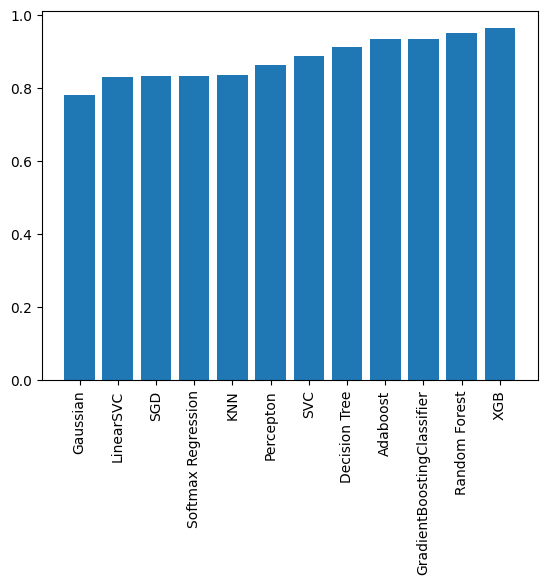

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

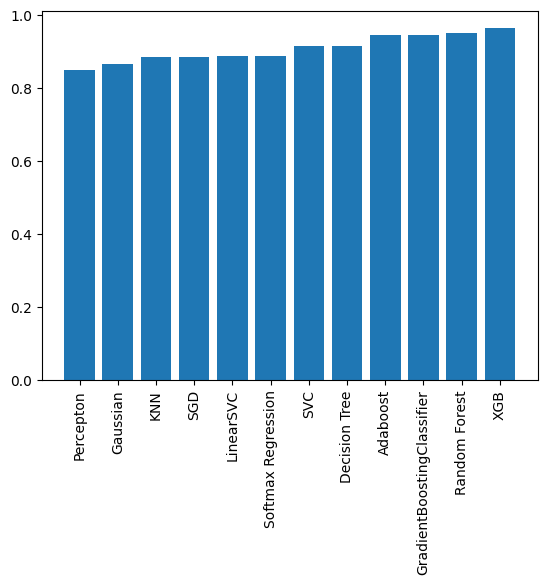

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

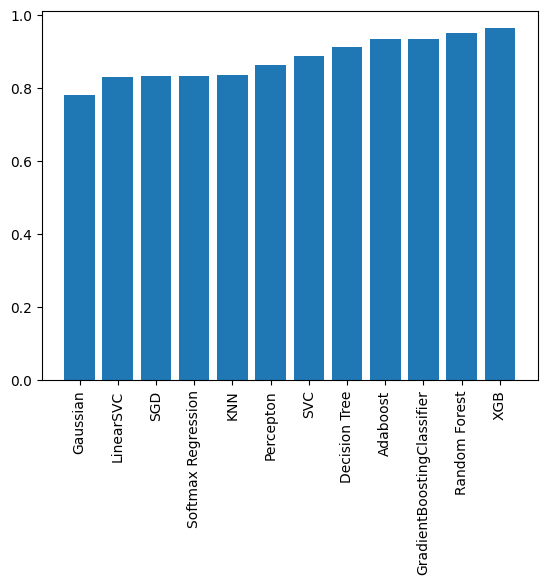

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

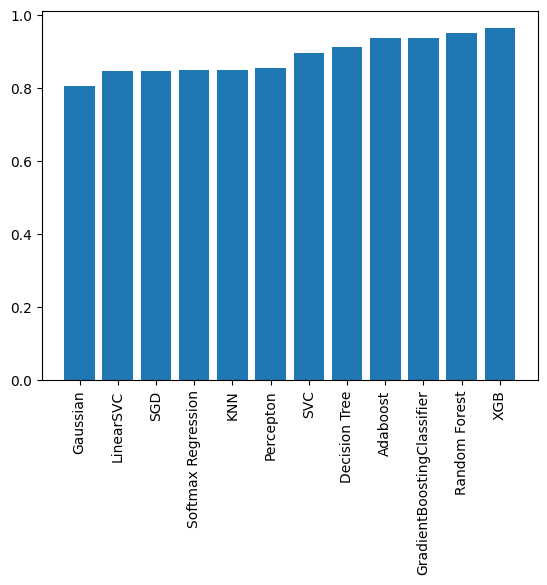

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### XGB

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score XGB:", scores.mean())
print("Standar Deviasi Score XGB:", scores.std())

Rata-Rata Score XGB: 0.9856483545169844
Standar Deviasi Score XGB: 0.0030111941244497778


###### Random Forest

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score Random Forest:", scores.mean())
print("Standar Deviasi Score Random Forest:", scores.std())

Rata-Rata Score Random Forest: 0.9870110498897848
Standar Deviasi Score Random Forest: 0.0027789366300781044


##### SMOTE

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'SMOTE'].values[0]
max_param

array(['Gender', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = SMOTE()

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({1: 4774, 0: 4774})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.928017,0.931067,0.928017,0.929258
Random Forest,0.946366,0.948817,0.946366,0.947290
Gaussian,0.785462,0.869736,0.785462,0.809904
KNN,0.868737,0.905290,0.868737,0.879420
Softmax Regression,0.834862,0.888134,0.834862,0.850611
LinearSVC,0.830628,0.885995,0.830628,0.847029
SVC,0.895554,0.916836,0.895554,0.902045
Percepton,0.773465,0.871983,0.773465,0.800769
SGD,0.822865,0.885149,0.822865,0.840938
XGB,0.961186,0.961576,0.961186,0.961360


In [ ]:
scores_df_1.reset_index(inplace=True)

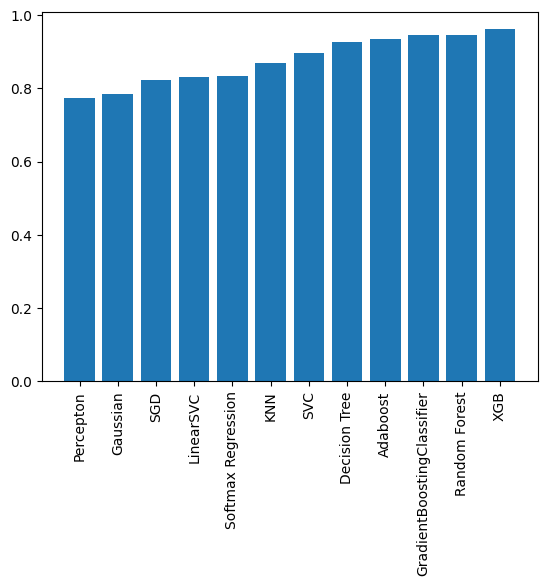

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

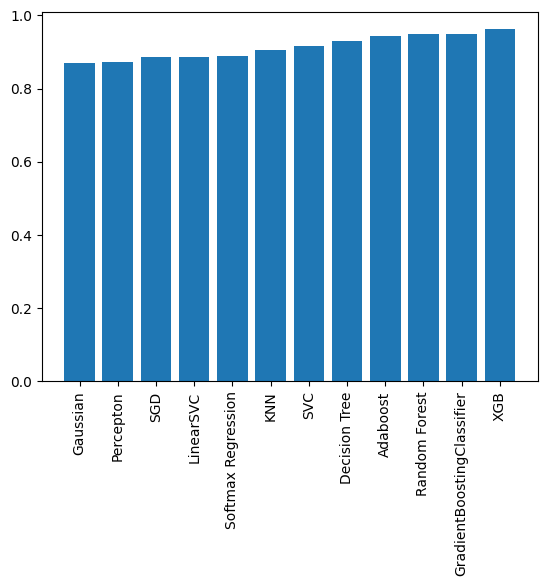

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

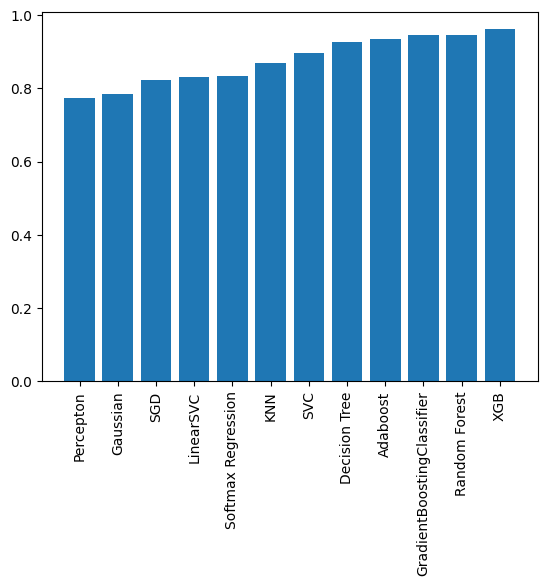

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

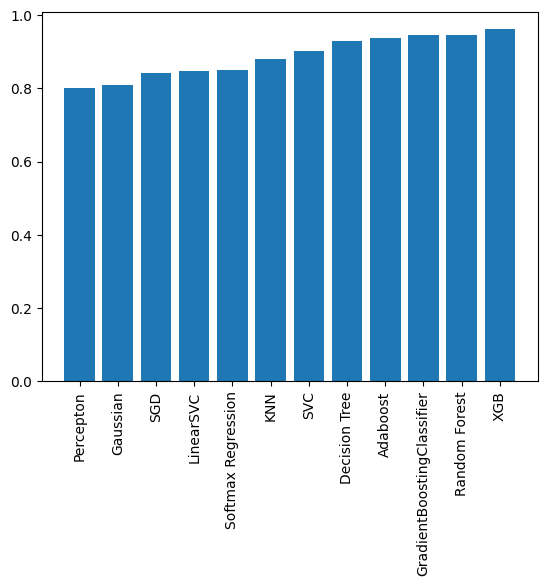

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### XGB

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score XGB:", scores.mean())
print("Standar Deviasi Score XGB:", scores.std())

Rata-Rata Score XGB: 0.9789471186063963
Standar Deviasi Score XGB: 0.0039517474611911515


###### GradientBoostingClassifier

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score GradientBoostingClassifier:", scores.mean())
print("Standar Deviasi Score GradientBoostingClassifier:", scores.std())

Rata-Rata Score GradientBoostingClassifier: 0.9642830365405217
Standar Deviasi Score GradientBoostingClassifier: 0.005239669414132951


##### Borderline Oversampling with SVM

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Borderline Oversampling with SVM'].values[0]
max_param

array(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = SVMSMOTE()

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({1: 4774, 0: 4774})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.930134,0.933632,0.930134,0.931507
Random Forest,0.952011,0.953020,0.952011,0.952437
Gaussian,0.772759,0.862180,0.772759,0.799094
KNN,0.825688,0.864184,0.825688,0.839145
Softmax Regression,0.847565,0.890263,0.847565,0.860643
LinearSVC,0.846860,0.890737,0.846860,0.860193
SVC,0.894143,0.908715,0.894143,0.899192
Percepton,0.837685,0.884561,0.837685,0.852153
SGD,0.786168,0.879453,0.786168,0.811581
XGB,0.966126,0.966255,0.966126,0.966187


In [ ]:
scores_df_1.reset_index(inplace=True)

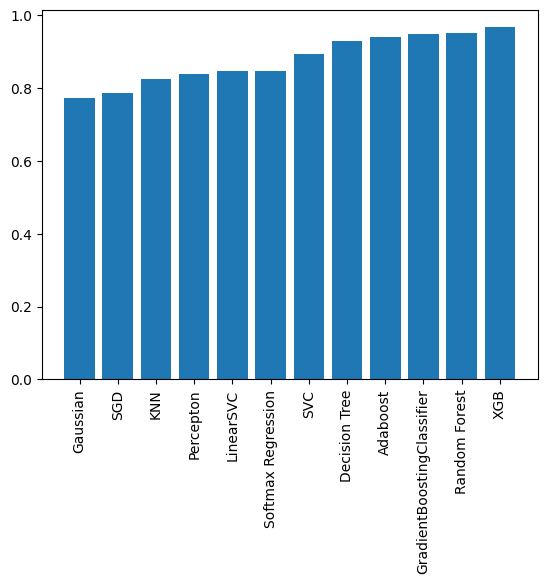

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

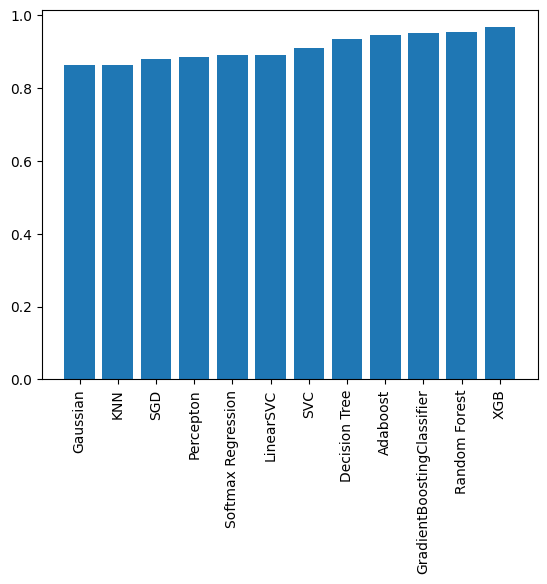

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

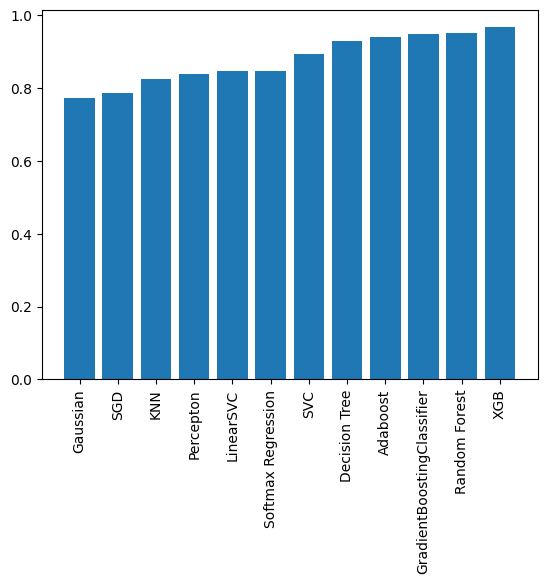

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

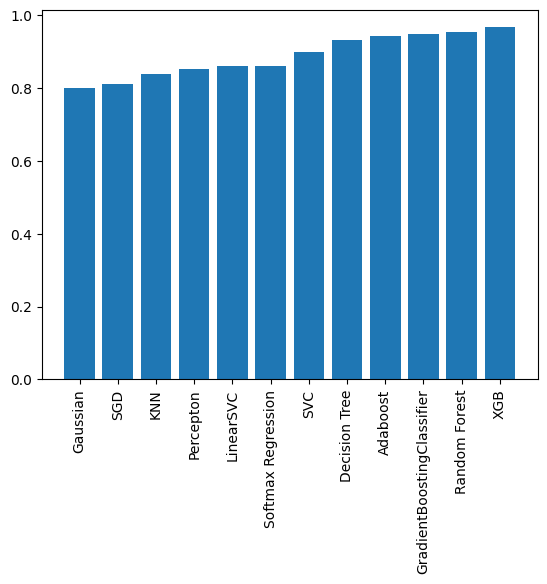

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### XGB

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score XGB:", scores.mean())
print("Standar Deviasi Score XGB:", scores.std())

Rata-Rata Score XGB: 0.9794715135661486
Standar Deviasi Score XGB: 0.002854614860773777


###### GradientBoostingClassifier

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score GradientBoostingClassifier:", scores.mean())
print("Standar Deviasi Score GradientBoostingClassifier:", scores.std())

Rata-Rata Score GradientBoostingClassifier: 0.966693458775066
Standar Deviasi Score GradientBoostingClassifier: 0.002951119032502713


##### Borderline-SMOTE

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Borderline-SMOTE'].values[0]
max_param

array(['Marital_Status', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = BorderlineSMOTE()

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({1: 4774, 0: 4774})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.929428,0.932432,0.929428,0.930645
Random Forest,0.948483,0.951918,0.948483,0.949659
Gaussian,0.760056,0.873490,0.760056,0.790240
KNN,0.850388,0.891295,0.850388,0.862965
Softmax Regression,0.809457,0.883730,0.809457,0.830352
LinearSVC,0.811574,0.887649,0.811574,0.832497
SVC,0.875794,0.911496,0.875794,0.885903
Percepton,0.443896,0.877338,0.443896,0.484512
SGD,0.802399,0.883525,0.802399,0.824811
XGB,0.962597,0.963146,0.962597,0.962831


In [ ]:
scores_df_1.reset_index(inplace=True)

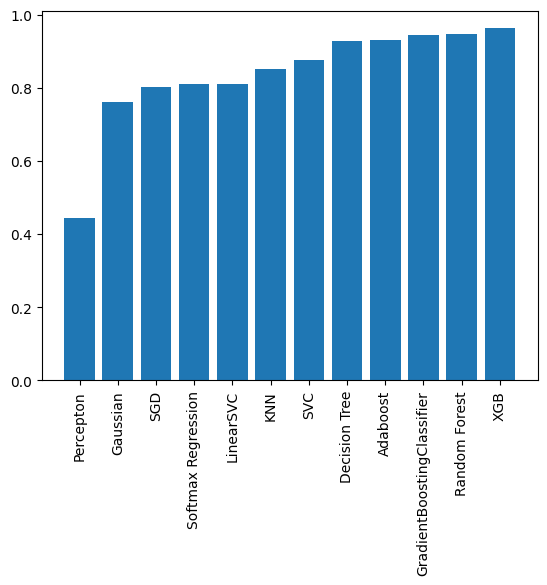

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

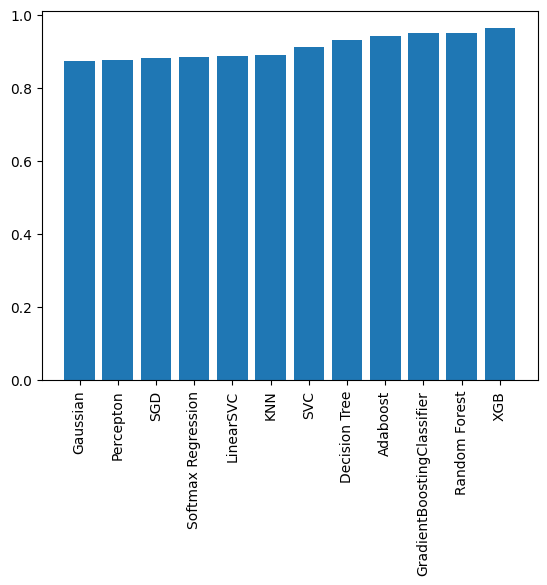

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

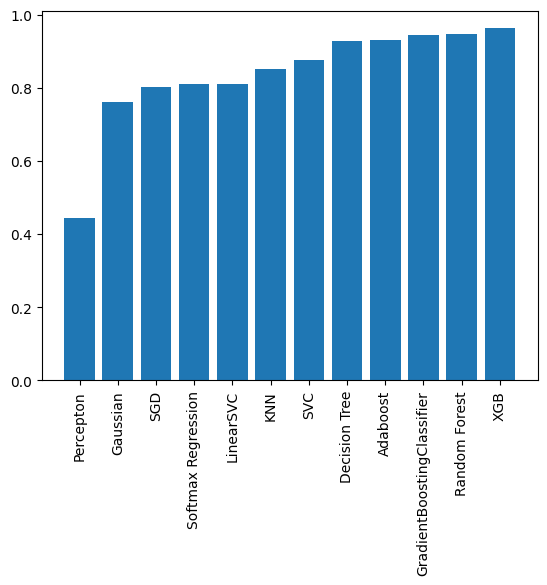

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

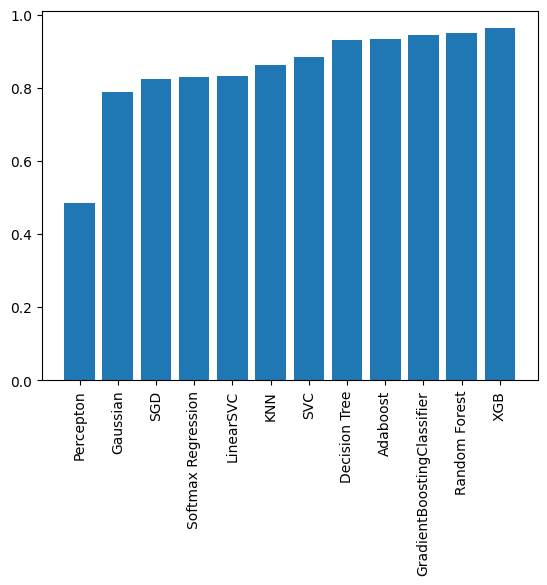

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### XGB

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score XGB:", scores.mean())
print("Standar Deviasi Score XGB:", scores.std())

Rata-Rata Score XGB: 0.979470267599674
Standar Deviasi Score XGB: 0.002053136392599063


###### Random Forest

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score Random Forest:", scores.mean())
print("Standar Deviasi Score Random Forest:", scores.std())

Rata-Rata Score Random Forest: 0.9739162249124304
Standar Deviasi Score Random Forest: 0.0011213149543143899


##### Random Undersampling

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Random Undersampling'].values[0]
max_param

array(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = NearMiss()

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({0: 890, 1: 890})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.901905,0.920528,0.901905,0.907608
Random Forest,0.897671,0.925820,0.897671,0.905273
Gaussian,0.652788,0.817350,0.652788,0.699474
KNN,0.743825,0.852492,0.743825,0.775393
Softmax Regression,0.798871,0.861187,0.798871,0.818847
LinearSVC,0.796754,0.862141,0.796754,0.817423
SVC,0.708539,0.854294,0.708539,0.747170
Percepton,0.812279,0.766835,0.812279,0.783634
SGD,0.807339,0.863831,0.807339,0.825642
XGB,0.918137,0.931771,0.918137,0.922250


In [ ]:
scores_df_1.reset_index(inplace=True)

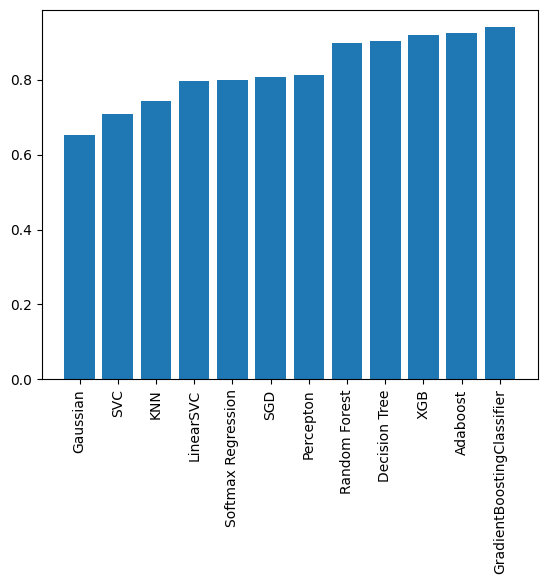

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

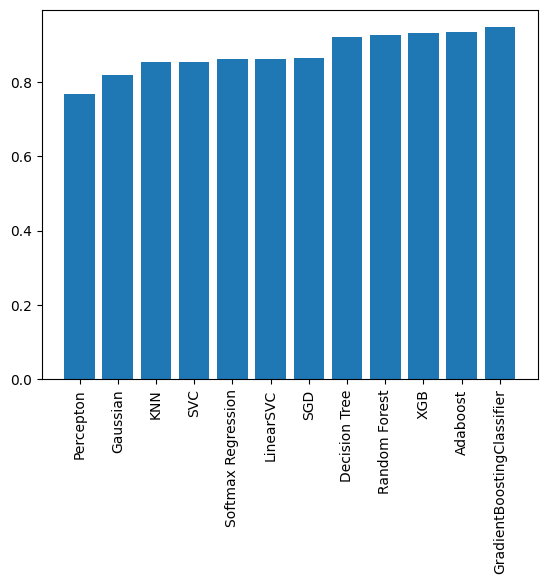

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

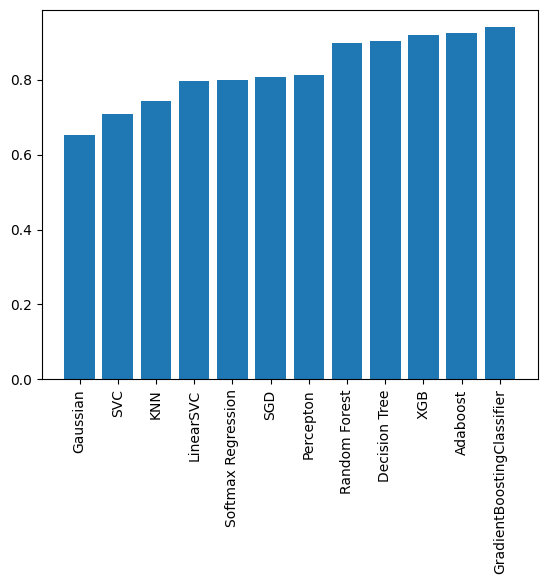

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

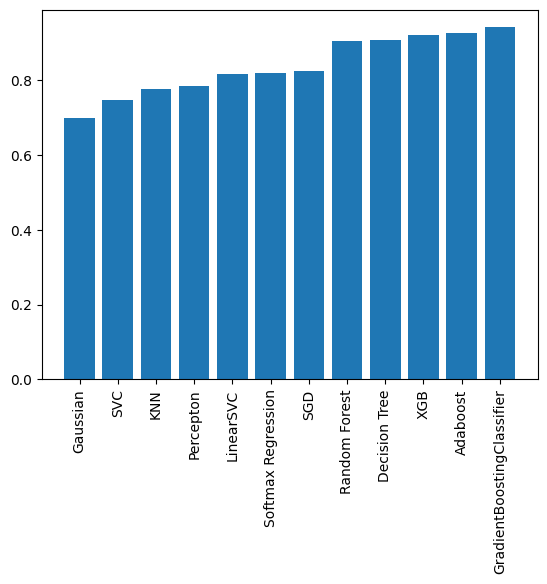

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### GradientBoostingClassifier

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score GradientBoostingClassifier:", scores.mean())
print("Standar Deviasi Score GradientBoostingClassifier:", scores.std())

Rata-Rata Score GradientBoostingClassifier: 0.9005627819456754
Standar Deviasi Score GradientBoostingClassifier: 0.016821316351532584


###### Adaboost

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
ada = AdaBoostClassifier()
scores = cross_val_score(ada, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score Adaboost:", scores.mean())
print("Standar Deviasi Score Adaboost:", scores.std())

Rata-Rata Score Adaboost: 0.8731226068393101
Standar Deviasi Score Adaboost: 0.014937302866035751


##### NearMiss

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'NearMiss'].values[0]
max_param

array(['Gender', 'Dependent_count', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
model = NearMiss()

In [ ]:
X_model, y_model = model.fit_resample(X_train_1, y_train_1)

In [ ]:
Counter(y_model)

Counter({0: 890, 1: 890})

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', max_iter=35000),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results_1 = fit_and_score(models, X_model, y_model, X_test_1, y_test_1)

In [ ]:
scores_df_1 = pd.DataFrame(fit_and_score_results_1).transpose()
for c in scores_df_1.columns:
    if c == 'recall':
        continue
    scores_df_1[c] = scores_df_1[c].astype(float)
scores_df_1

,score,precision-weighted,recall-weighted,f1-score-weighted
Decision Tree,0.835568,0.899341,0.835568,0.852768
Random Forest,0.808751,0.899020,0.808751,0.831480
Gaussian,0.712068,0.785529,0.712068,0.740564
KNN,0.708539,0.837150,0.708539,0.746016
Softmax Regression,0.784051,0.865126,0.784051,0.808205
LinearSVC,0.782639,0.862226,0.782639,0.806717
SVC,0.718419,0.854348,0.718419,0.755242
Percepton,0.727594,0.828266,0.727594,0.759908
SGD,0.805928,0.865729,0.805928,0.824930
XGB,0.858857,0.912031,0.858857,0.872726


In [ ]:
scores_df_1.reset_index(inplace=True)

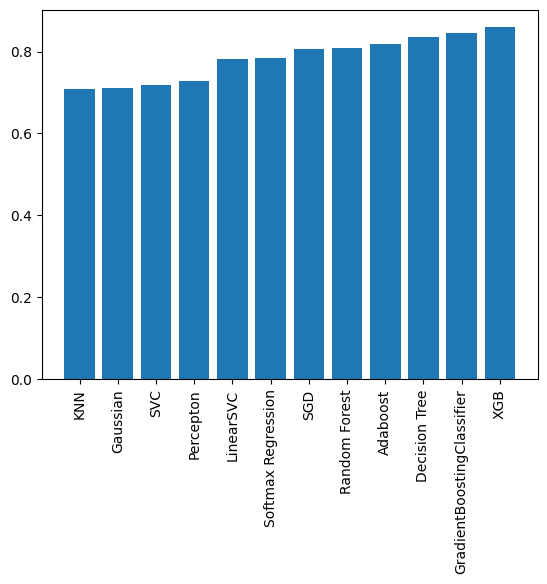

In [ ]:
scores_df_1 = scores_df_1.sort_values('score')
plt.bar(scores_df_1['index'], scores_df_1['score'])
plt.xticks(rotation='vertical')
plt.show()

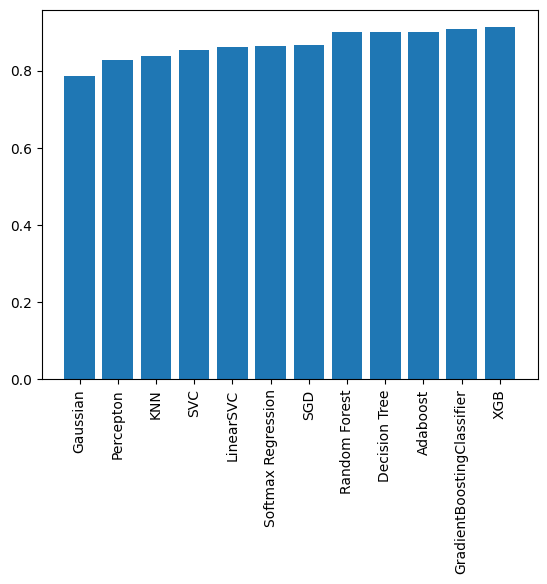

In [ ]:
scores_df_1 = scores_df_1.sort_values('precision-weighted')
plt.bar(scores_df_1['index'], scores_df_1['precision-weighted'])
plt.xticks(rotation='vertical')
plt.show()

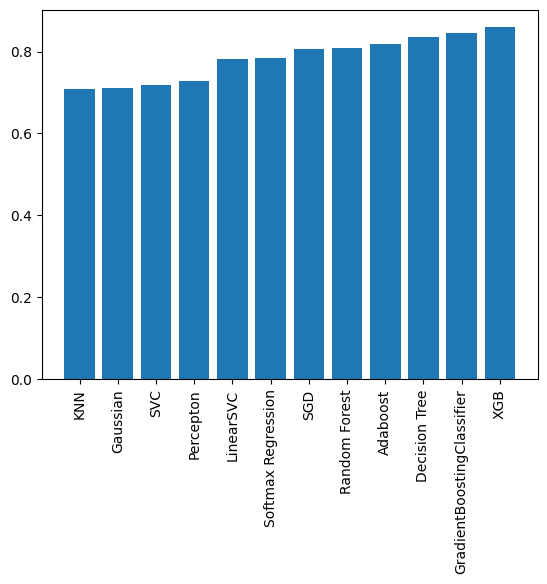

In [ ]:
scores_df_1 = scores_df_1.sort_values('recall-weighted')
plt.bar(scores_df_1['index'], scores_df_1['recall-weighted'])
plt.xticks(rotation='vertical')
plt.show()

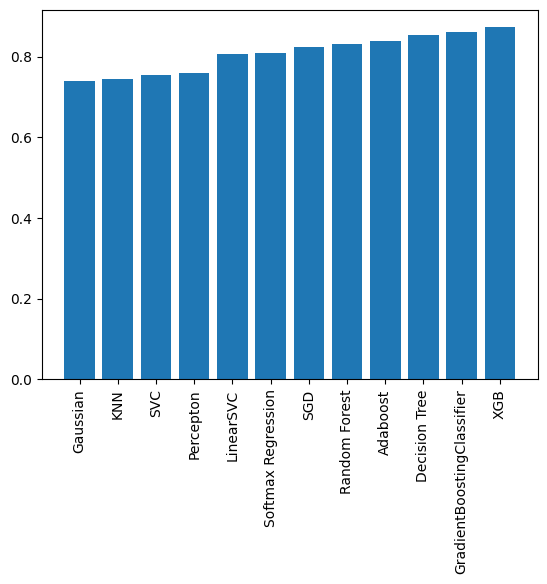

In [ ]:
scores_df_1 = scores_df_1.sort_values('f1-score-weighted')
plt.bar(scores_df_1['index'], scores_df_1['f1-score-weighted'])
plt.xticks(rotation='vertical')
plt.show()

###### XGB

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score XGB:", scores.mean())
print("Standar Deviasi Score XGB:", scores.std())

Rata-Rata Score XGB: 0.921382224722012
Standar Deviasi Score XGB: 0.009531819492070185


###### GradientBoostingClassifier

In [ ]:
cv_classification = KFold(random_state=2110, shuffle=True)
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_model, y_model, scoring='f1_weighted', cv=cv_classification)
print("Rata-Rata Score GradientBoostingClassifier:", scores.mean())
print("Standar Deviasi Score GradientBoostingClassifier:", scores.std())

Rata-Rata Score GradientBoostingClassifier: 0.9264442799818404
Standar Deviasi Score GradientBoostingClassifier: 0.019000089662961978


#### Pilih Model dan tuning hyperparameter

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

def train_and_evaluate_model(pipeline, param_grid, model_name, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(best_model)

    y_pred = best_model.predict(X_test)

    evaluate_classifier_performance(y_pred, y_test)


##### XGBClassifier dengan Random Oversampling

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Random Oversampling'].values[0]
X_1 = X[max_param]

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy='minority')),
    ('classifier', XGBClassifier())
])

param_grid = {
    'classifier__min_child_weight': [1, 5, 10],
    'classifier__gamma': [0.5, 1, 1.5, 2, 5],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__max_depth': [3, 4, 5]
}

In [ ]:
train_and_evaluate_model(pipeline, param_grid, "XGBClassifier dengan Random Oversampling", X_train_1, y_train_1, X_test_1, y_test_1)

Pipeline(steps=[('oversample', RandomOverSampler(sampling_strategy='minority')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.5, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_j

prediction,0,1
actual,,
0,205,18
1,30,1164




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9661256175017643
F1 Macro Average: 0.937497243174099
F1 Micro Average: 0.9661256175017643
Precision Macro Average: 0.928555999567988
Precision Micro Average: 0.9661256175017643
Recall Macro Average: 0.9470784415350294
Recall Micro Average: 0.9661256175017643



##### Random Forest dengan Borderline-Random Oversampling

In [ ]:
max_param = feature_imbalanced['max_param'].loc[feature_imbalanced['teknik'] == 'Random Oversampling'].values[0]
X_1 = X[max_param]

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_1, y_1, stratify=y_1, train_size=0.8, random_state=2110)

In [ ]:
pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy='minority')),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [25, 50, 100, 150],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__max_depth': [3, 6, 9],
    'classifier__max_leaf_nodes': [3, 6, 9],
}

In [ ]:
train_and_evaluate_model(pipeline, param_grid, "Random Forest dengan Borderline-Random Oversampling", X_train_2, y_train_2, X_test_2, y_test_2)

Pipeline(steps=[('oversample', RandomOverSampler(sampling_strategy='minority')),
                ('classifier',
                 RandomForestClassifier(max_depth=6, max_leaf_nodes=9))])
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.58      0.90      0.70       223
           1       0.98      0.88      0.93      1194

    accuracy                           0.88      1417
   macro avg       0.78      0.89      0.81      1417
weighted avg       0.92      0.88      0.89      1417



Confusion Matrix



prediction,0,1
actual,,
0,200,23
1,146,1048




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8807339449541285
F1 Macro Average: 0.8141870055905369
F1 Micro Average: 0.8807339449541285
Precision Macro Average: 0.7782797126557752
Precision Micro Average: 0.8807339449541285
Recall Macro Average: 0.8872914647978307
Recall Micro Average: 0.8807339449541285



#### Kesimpulan Modeling Classification

**XGBClassifier dengan Random Oversampling**

Fitur yang digunakan:
'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',   'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

## Evaluasi

**XGBClassifier dengan Random Oversampling**

Fitur yang digunakan: 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

Hasil Evaluasi berdasarkan classification report

              precision    recall  f1-score   support
           0       0.87      0.92      0.90       223
           1       0.98      0.97      0.98      1194

    accuracy                           0.97      1417
    macro avg      0.93      0.95      0.94      1417
    weighted avg   0.97      0.97      0.97      1417

Confusion Matrix

    prediction/actual        0        1
           0                 205      18
           1                 30       1164


*   Accuracy Average: 0.9661256175017643
*   F1 Macro Average: 0.937497243174099
*   F1 Micro Average: 0.9661256175017643
*   Precision Macro Average: 0.928555999567988
*   Precision Micro Average: 0.9661256175017643
*   Recall Macro Average: 0.9470784415350294
*   Recall Micro Average: 0.9661256175017643